# Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 

- The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 

If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

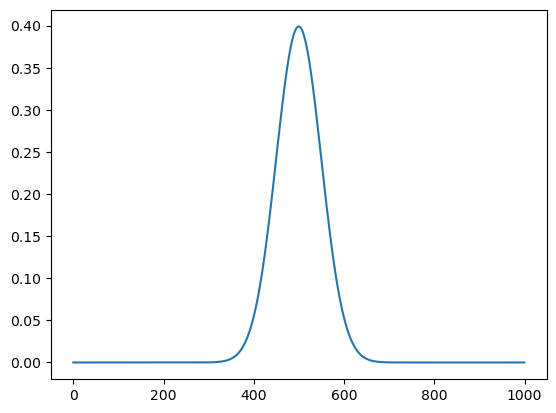

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

# define normal distribution 
# takes a list of x values in a given range with some number of finite
# divisions, will create a y value that correlates with x value that was
# passed
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000) ):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

normal_dist_list = normal_dist(mean = 0, sd = 1)
plt.plot(normal_dist_list)

Text(0.5, 1.0, '$\\mu$ = 0\t$\\sigma_0$ = 1\t$\\sigma_1$ = 2\t$\\sigma_2$ = 3\t')

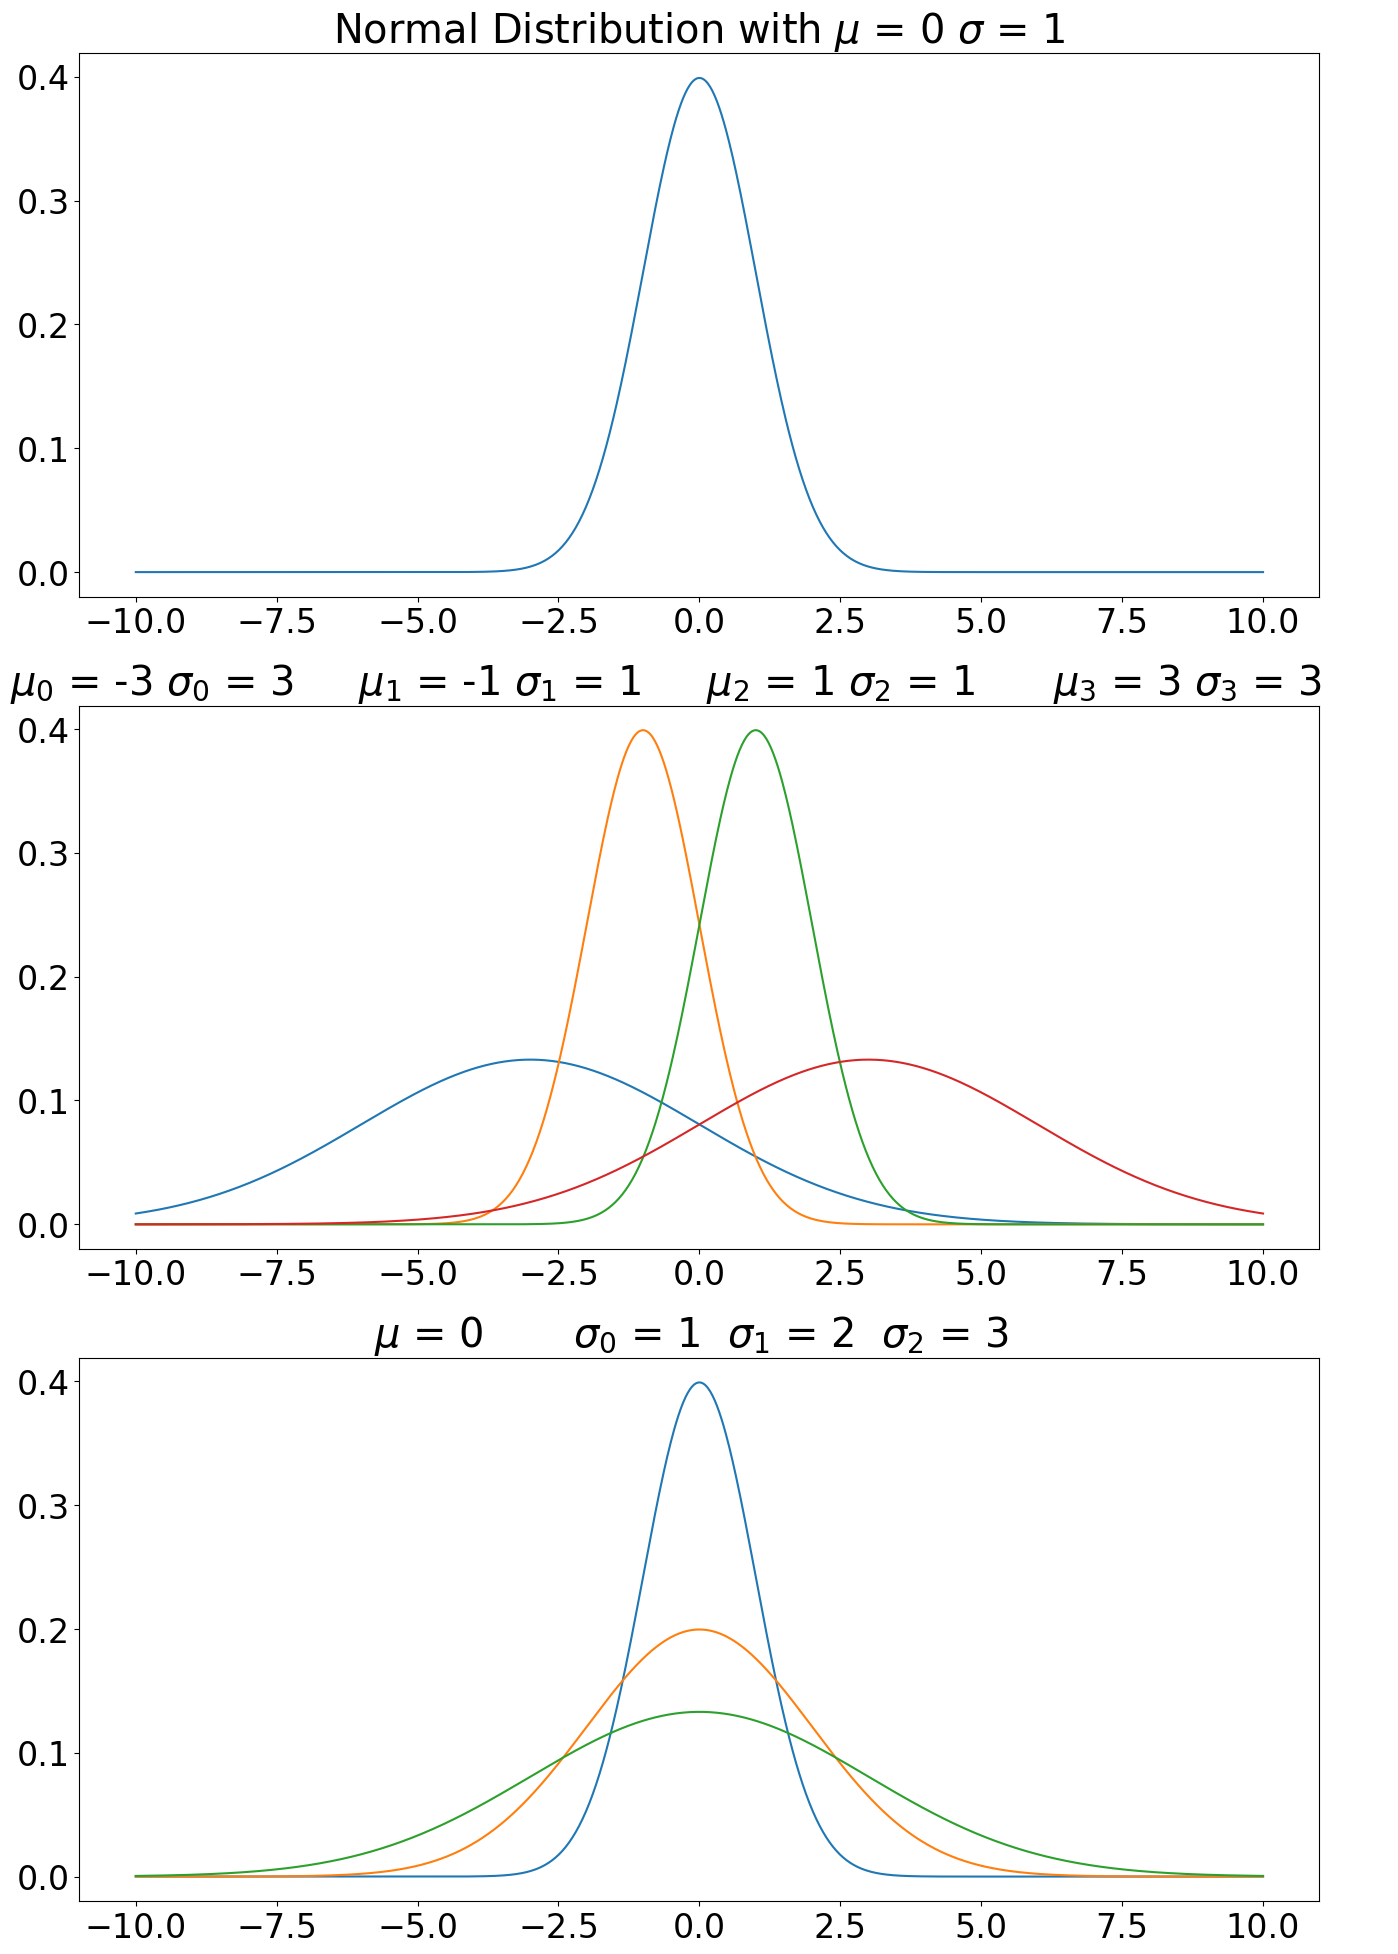

In [2]:
plt.rcParams.update({"font.size":24})
fig, axs = plt.subplots(3,1, figsize = (16,24))
x = np.linspace(-10,10,1000)

# perform transformation
mean_, sd = 0,1
normal_dist_list = normal_dist(mean = mean_, sd = sd, x = x)
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Normal Distribution with $\mu$ = " + \
                 str(mean_) + " $\sigma$ = " + str(sd))

# plot normal curves with varying means 
ax1_title = ""
ax1_sub = 0
for mean_ in range(-3,4, 2):
    sd = abs(mean_)
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[1].plot(x, normal_dist_list)
    # add titles
    ax1_title = ax1_title + "$\mu_" + str(ax1_sub) + "$ = " + str(mean_) + " "
    ax1_title = ax1_title + "$\sigma_" + str(ax1_sub) + "$ = " + str(sd) + "\t"
    ax1_sub += 1
axs[1].set_title(ax1_title)

# plot normal curves with varying standard deviations 
ax2_title = "$\mu$ = 0\t"
ax2_sub = 0
for sd in range(1,4):
    mean_ = 0
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[2].plot(x, normal_dist_list)
    ax2_title = ax2_title + "$\sigma_" + str(ax2_sub) + "$ = " + str(sd) + "\t"
    ax2_sub += 1
axs[2].set_title(ax2_title)


## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 


In [3]:
import warnings
warnings.filterwarnings("ignore")

# create a log normal distribution
def create_lognormal(mean, sd, x = np.linspace(0,10,1000)):
    # create density function:
    density_points = (1 / x * sd * np.sqrt(2 * np.pi))* np.e **(
        -(np.log(x) - mean) ** 2 / (2 * sd ** 2))
    return density_points

x = np.linspace(0,10,10000)
mean, sd = 1, 1
log_norm = create_lognormal(mean=mean, sd = sd, x = x) 

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

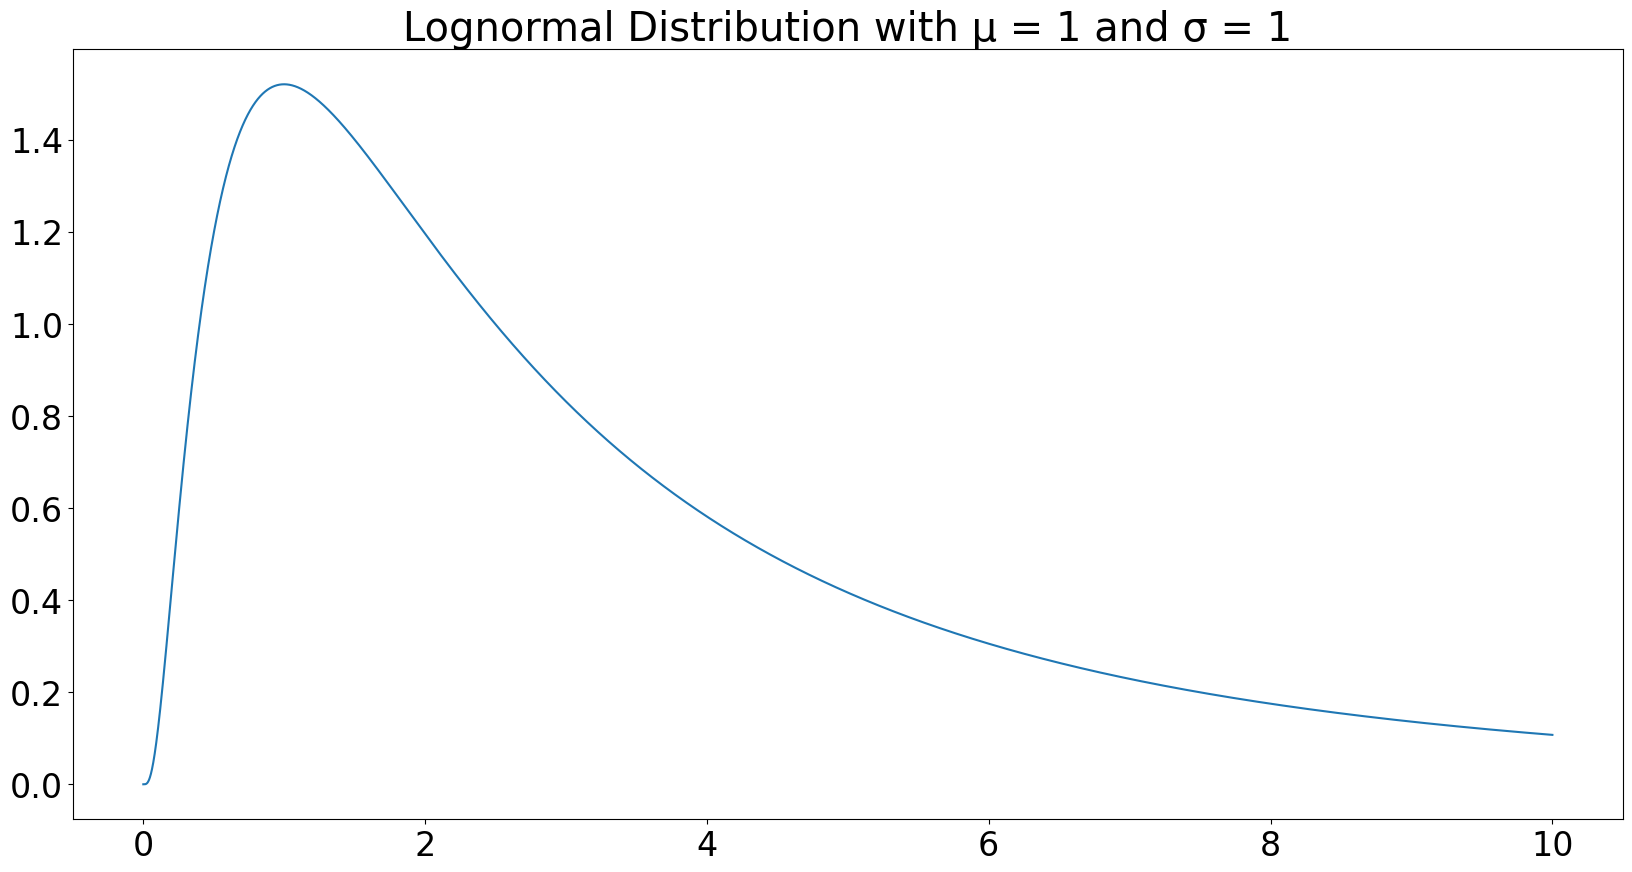

In [4]:
fig, ax = plt.subplots(figsize = (20,10))
# plot x values (linspace)
ax.plot(x, log_norm)
ax.set_title("Lognormal Distribution with μ = " + str(mean) +" and σ = " + str(sd))

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

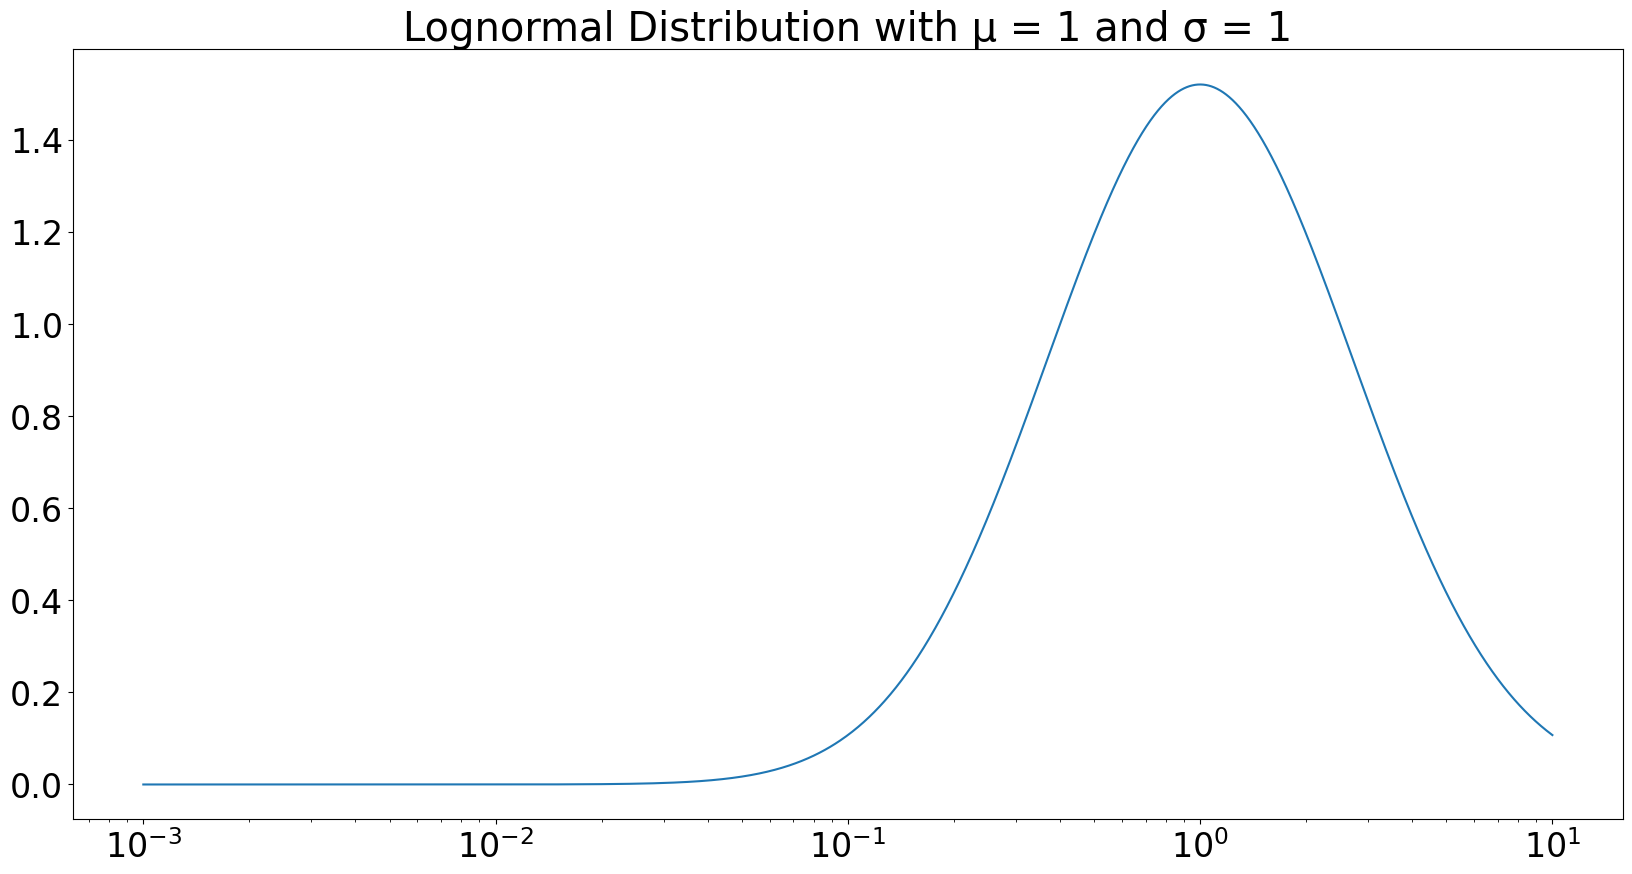

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, log_norm)
plt.xscale("log")
ax.set_title(
    "Lognormal Distribution with μ = " + str(mean) +" and σ = " + str(sd))

## Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 


In [6]:
def binomial(x, n, p):
    q = 1 - p
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n-x)) * p ** x * q **(n - x)
binomial(x = 50, n = 100, p = .5)

0.07958923738717875

In [7]:
#calculate the overall probability that you get between certain numbers
# create a function for it:
def probability_of_outcome(X0, X1, p, n):
    P = 0
    for x in range (X0, X1 + 1):
        P += binomial(x = x, n = n, p = p)
    return P
    
p, n = .5, 100
X0 = 40
X1 = 60

probability_of_outcome(X0, X1, p, n)

0.9647997997822952

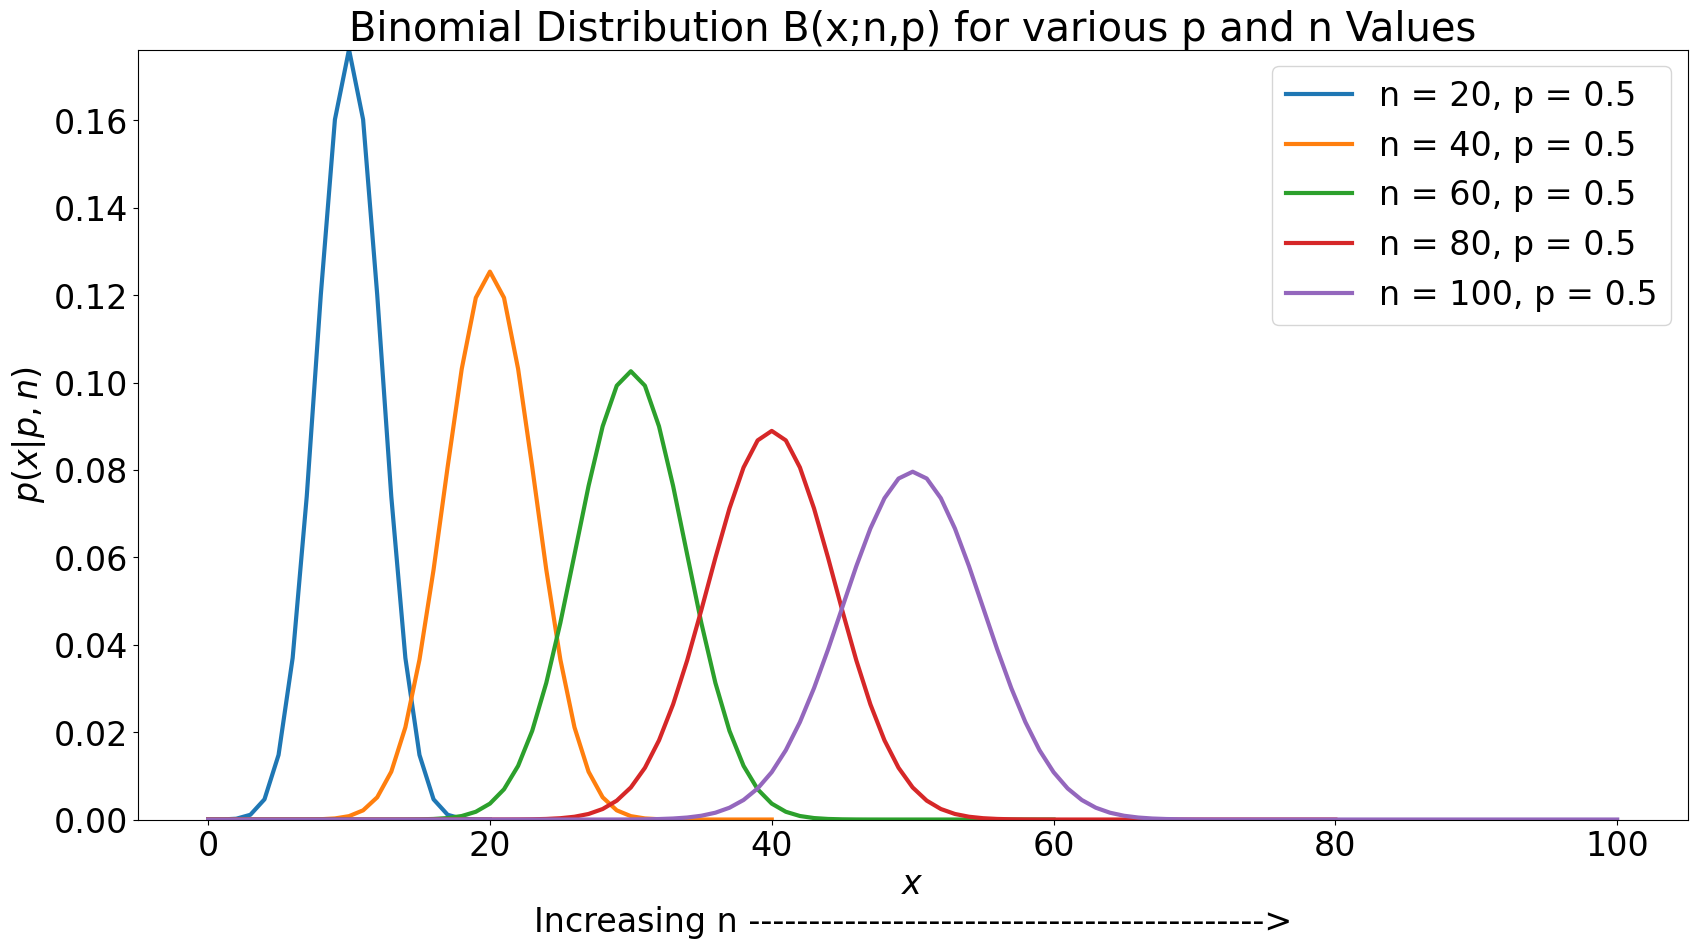

In [8]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize = (20,10))
cmap = cm.get_cmap("Blues")
ymax = binomial(20 * p, 20, p)
        
# run with different ranges of n
for n in range(20, 101, 20):
   # x = int(n * p)
    # make a list of probability of every possible outcome
    # from 0 to n
    binom_vars = [binomial(x, n, p) for x in range(n + 1)]
    # plot line that is composed of all probabilities
    plt.plot(binom_vars,
             linewidth  = 3,
            label = f"n = {n}, p = {p}")
    # set the y scale limits
ax.set_ylim(ymin = 0,ymax = ymax)

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()


## Poisson Distribution

The Poisson probability distribution applies to many random phenomena occurring during a period of time- for example, the number of faulty products coming off an assembly line in a day or week. It also applies to spatial phenomena such as, for example, the number of typing errors on a page.

A Poisson random variable is a discrete variable that can take on any integer value from zero to infinity. The value gives the number of occurrences of the circumstance of interest during a particular period of time or within a particular spatial area. A unit probability mass is assigned to this sample space. Our concern is then with the probability that there will be, for example, zero, one, two, three, etc., calls to the police during a particular time period on a typical day, or that in typing this chapter I will make zero, one, two, etc. errors on a particular page.

**The Poisson probability function is**

<h3 align="center">
    <font size="4">
        $ P(x) = \frac{\lambda^xe^{-\lambda}}{x!}$
    </font>
    </h3> 
    
where 
- $\lambda$ = the expected mean of x over many trials

- $x$ is the number of occurences that actually happen
      
- $P(X)$ is the probability that x would equal a given x value

The poisson tells us: what is the probability of x occurences happening in a timeframe when the expected number of occurrences is $\lambda$?

For example - what is the probability of 10 people quitting from your company this year when the average has historically been 5?
-  $ P(10) = \frac{5^{10}e^{-5}}{10!} = ~0.018$

- There is a 1.8% chance that 10 or more employees quit this year. 

## Working with Time Series Data

We will be working with stock price data. This data is an instance of time series data. The structure of untransformed time series data often violates the requirements of a random variable that observations be:

1. identitically distributed 
2. independent

To be identitically distributed means that observations are drawn from the same distribution. To be independent means that neighboring observations should not mutually influence one another. The independence criterion is typically violated for a single variable. Further, if two variables are subject to the I.I.D. assumptions, then not only must observations from a sample be subject to this criterion, but so too observations of the two variables must not be correlated. Here, we will show that individual samples are identically distributed. In a Chapter 6, we will be able to test whether or not the draws are observations of a given sample are independent of their neighbors. And in chpater 7, we will later consider the I.I.D. assumption when working with multiple variables using Ordinary Least Squares regression.

In [9]:
!pip install yfinance

In [10]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import pandas as pd

In [11]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

# add stocks to dictionary
data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
data_dict["MSFT"]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.413065   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.916992   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.140963   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.484919   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.188955   
...                ...         ...         ...         ...         ...   
2023-03-21  274.880005  275.000000  269.519989  273.779999  273.779999   
2023-03-22  273.399994  281.040009  272.179993  272.290009  272.290009   
2023-03-23  277.940002  281.059998  275.200012  277.660004  277.660004   
2023-03-24  277.239990  280.630005  275.279999  280.570007  280.570007   
2023-03-27  280.500000  281.459991  275.519989  276.380005  276.380005   

              Volume  
Date                  
2012-01-03  64731500  
2012-01-04  80516100  
2012-01-05  56081400  
2012-01-06  99455500  
2012-01-09  59706800  
...              ...  
2023-03-21  34558700  
2023-03-22  34873300  
2023-03-23  36610900  
2023-03-24  28172000  
2023-03-27  26808900  

[2826 rows x 6 columns]

# Create a dataframe for the close data of all four stocks

In [13]:
# get only the "Close" data
close_data = pd.concat([df["Close"] for df in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)
close_data

MSFT        AAPL          PG        TSLA
Date                                                      
2012-01-03   26.770000   14.686786   66.830002    1.872000
2012-01-04   27.400000   14.765714   66.800003    1.847333
2012-01-05   27.680000   14.929643   66.519997    1.808000
2012-01-06   28.110001   15.085714   66.360001    1.794000
2012-01-09   27.740000   15.061786   66.639999    1.816667
...                ...         ...         ...         ...
2023-03-21  273.779999  159.279999  144.080002  197.580002
2023-03-22  272.290009  157.830002  143.990005  191.149994
2023-03-23  277.660004  158.929993  143.789993  192.220001
2023-03-24  280.570007  160.250000  146.720001  190.410004
2023-03-27  276.380005  158.279999  145.949997  191.809998

[2826 rows x 4 columns]

Text(0.5, 1.0, 'Daily Stock Prices')

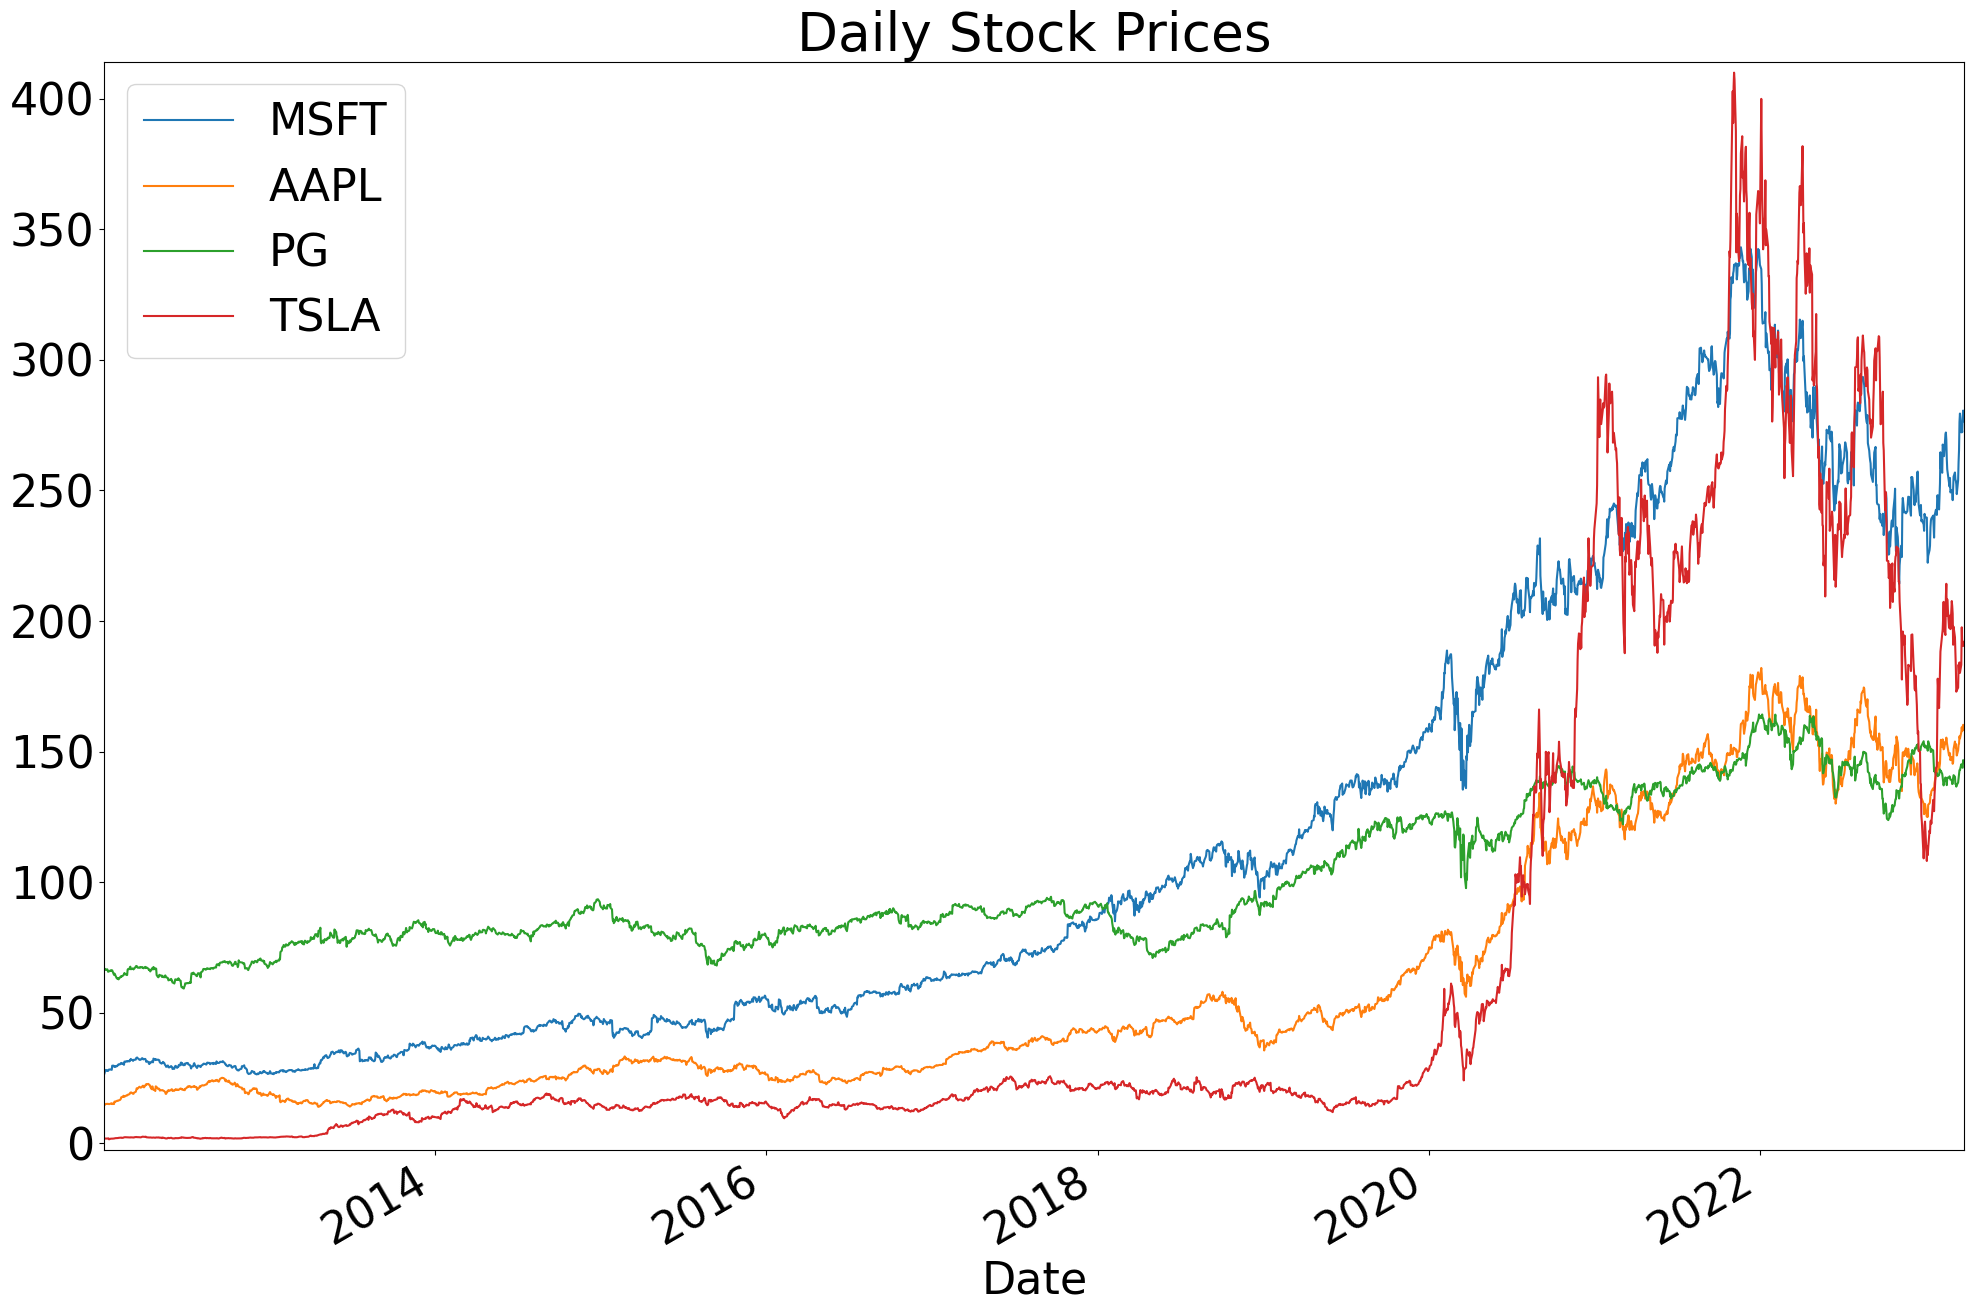

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")


The data appears to be quite volatile. This is because we are viewing data in observed units rather than comparing changes in proportional terms. If we log the axis, we will see that the data actually is much more stable than would be suggested by the above graph. 

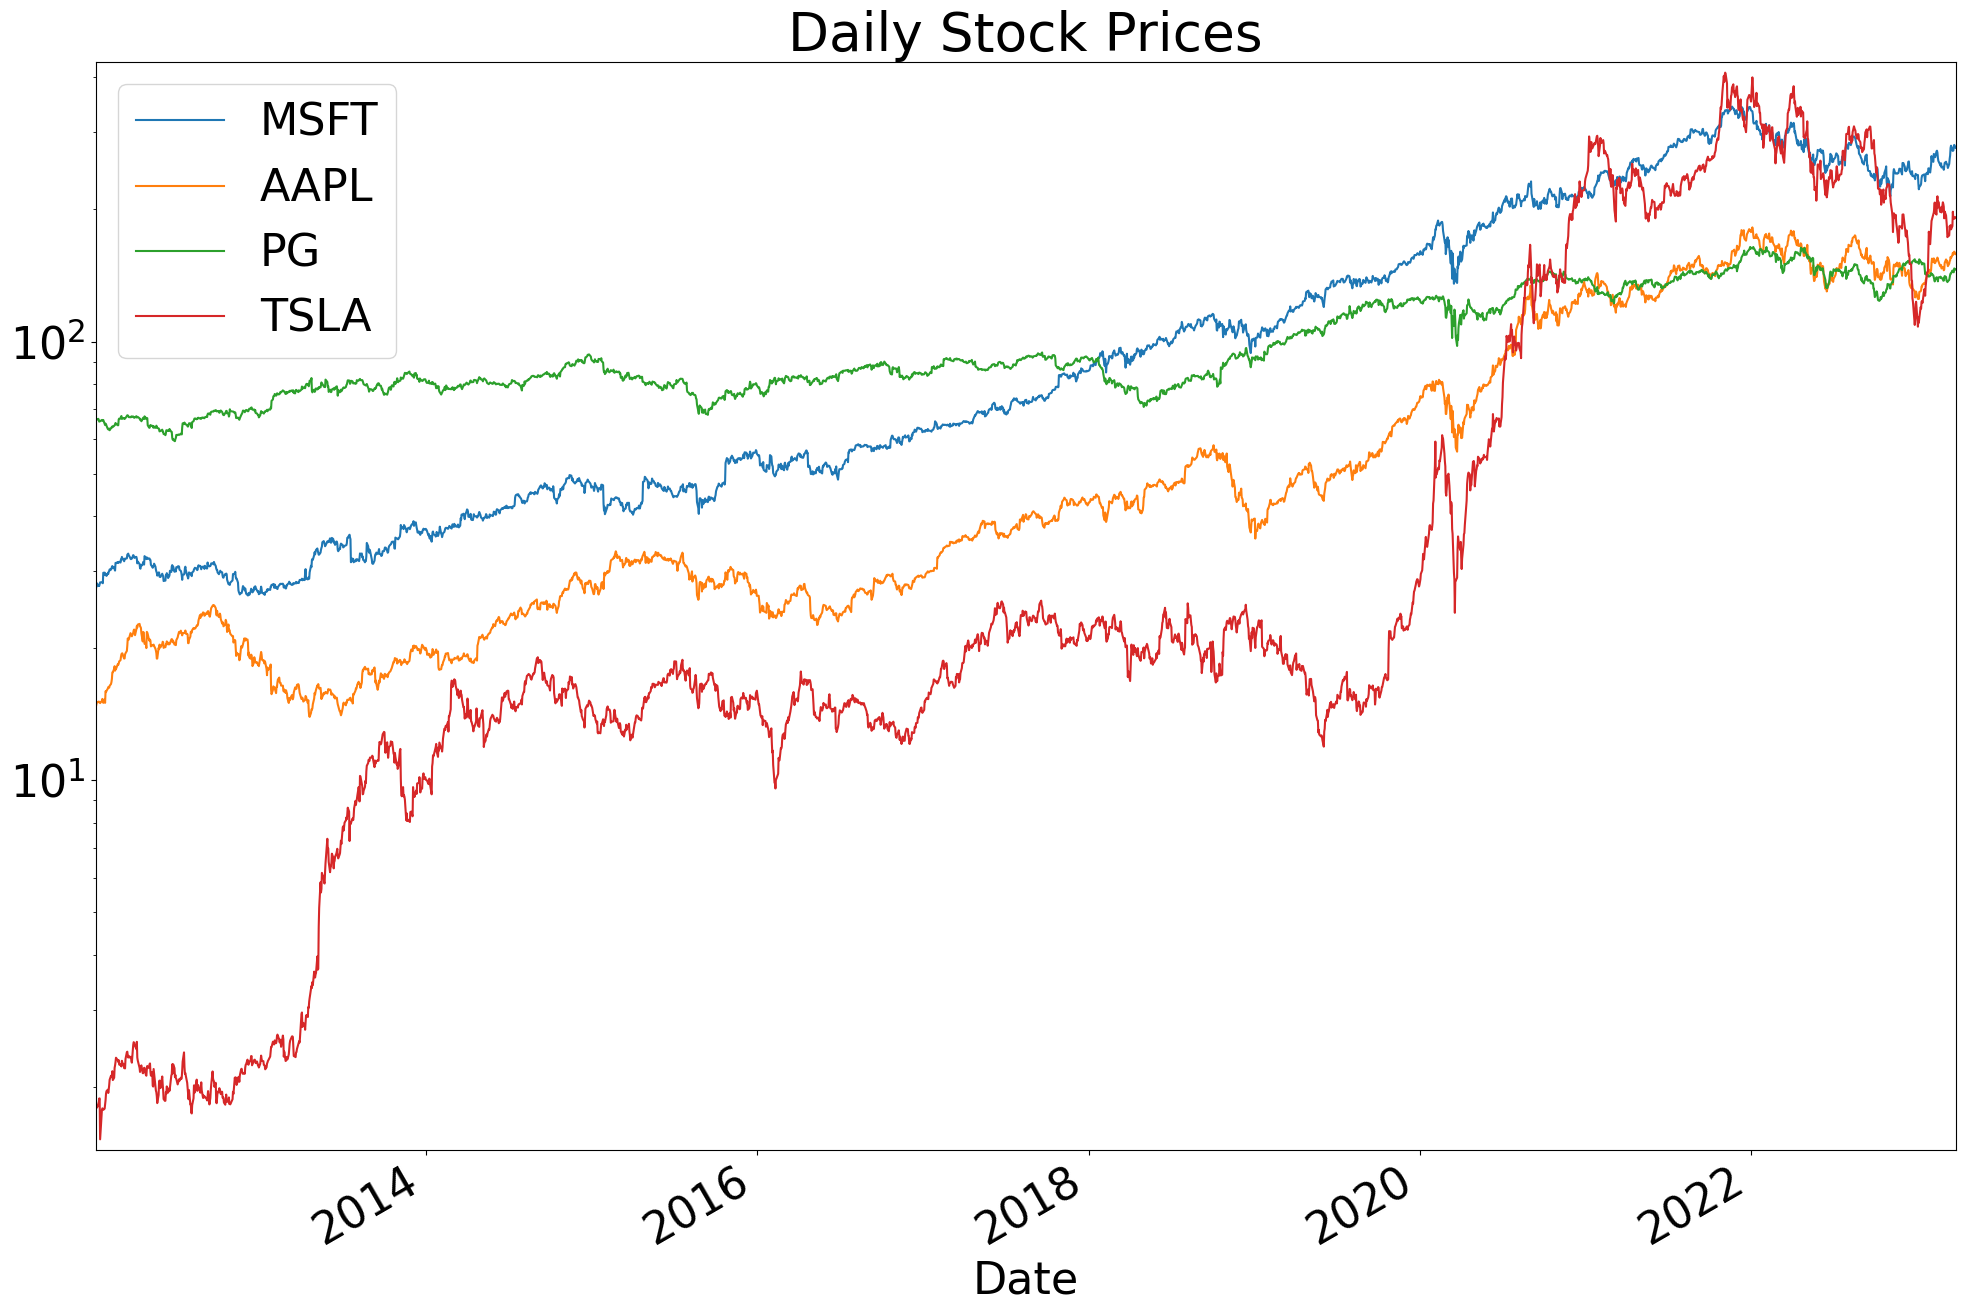

In [15]:
# look at the log data to view in proportional terms
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")
ax.set_yscale("log")

Text(0.5, 1.0, 'AAPL')

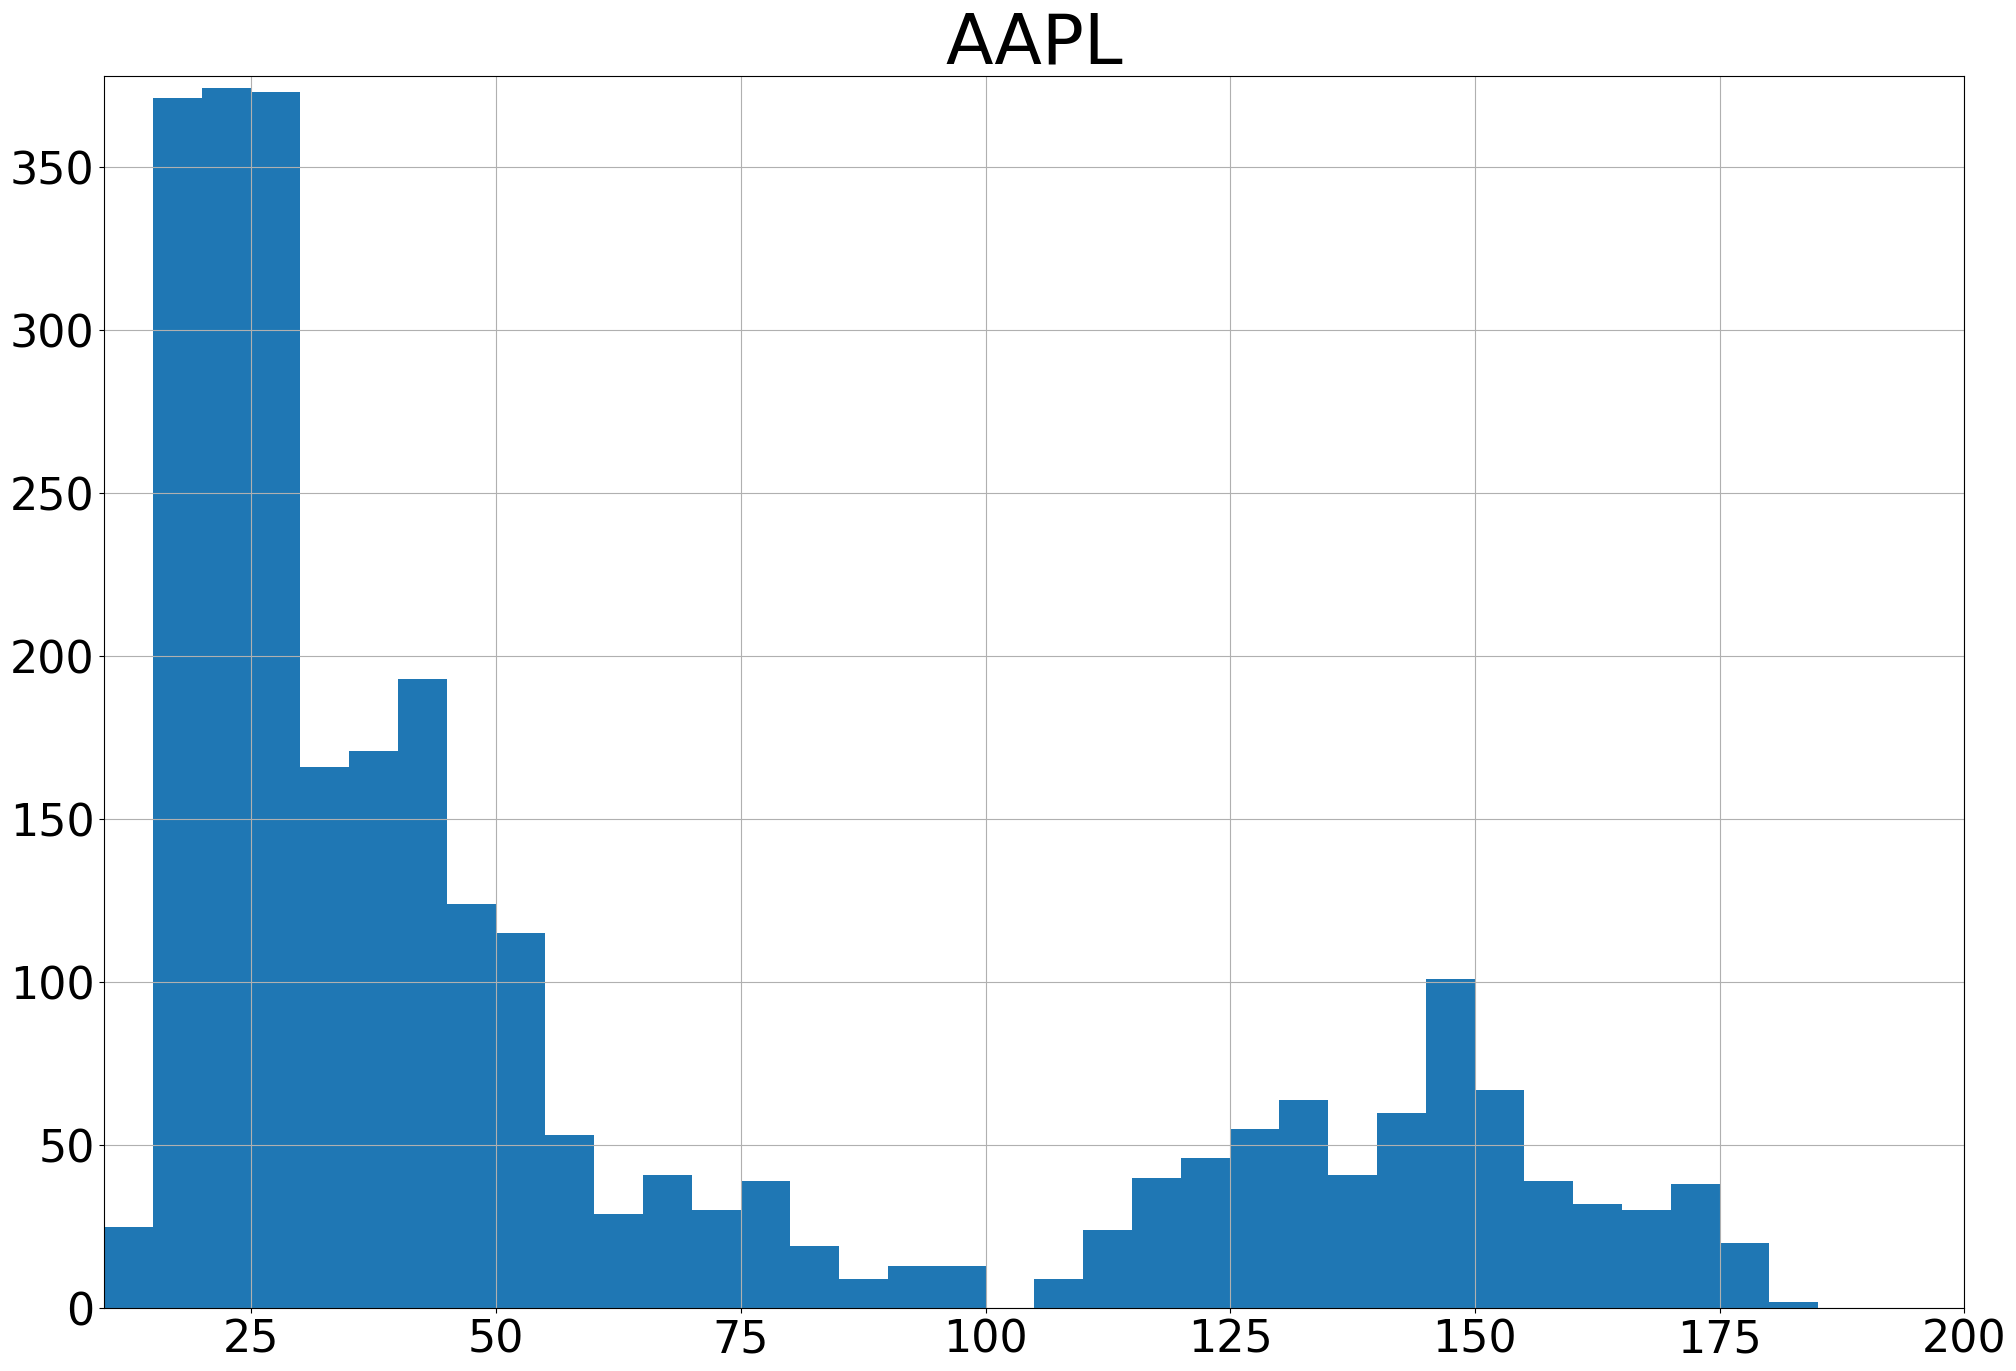

In [16]:
# make a histogram of the data:
fig, ax = plt.subplots(figsize = (24, 16))
stock = "AAPL"
# close_data[stock].hist(bins = 50)
close_data[stock].hist(bins = [i for i in range(10, 201, 5)])
ax.set_title(stock, fontsize = 50)

In [17]:
# log the data 
import numpy as np
log_data = np.log(close_data)
log_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03  3.287282  2.686948  4.202152  0.627007
2012-01-04  3.310543  2.692308  4.201703  0.613743
2012-01-05  3.320710  2.703349  4.197503  0.592221
2012-01-06  3.336125  2.713748  4.195094  0.584448
2012-01-09  3.322875  2.712161  4.199305  0.597003
...              ...       ...       ...       ...
2023-03-21  5.612325  5.070664  4.970369  5.286144
2023-03-22  5.606868  5.061519  4.969744  5.253058
2023-03-23  5.626397  5.068464  4.968354  5.258641
2023-03-24  5.636823  5.076735  4.988526  5.249180
2023-03-27  5.621777  5.064366  4.983264  5.256505

[2826 rows x 4 columns]

Text(0.5, 1.0, 'AAPL')

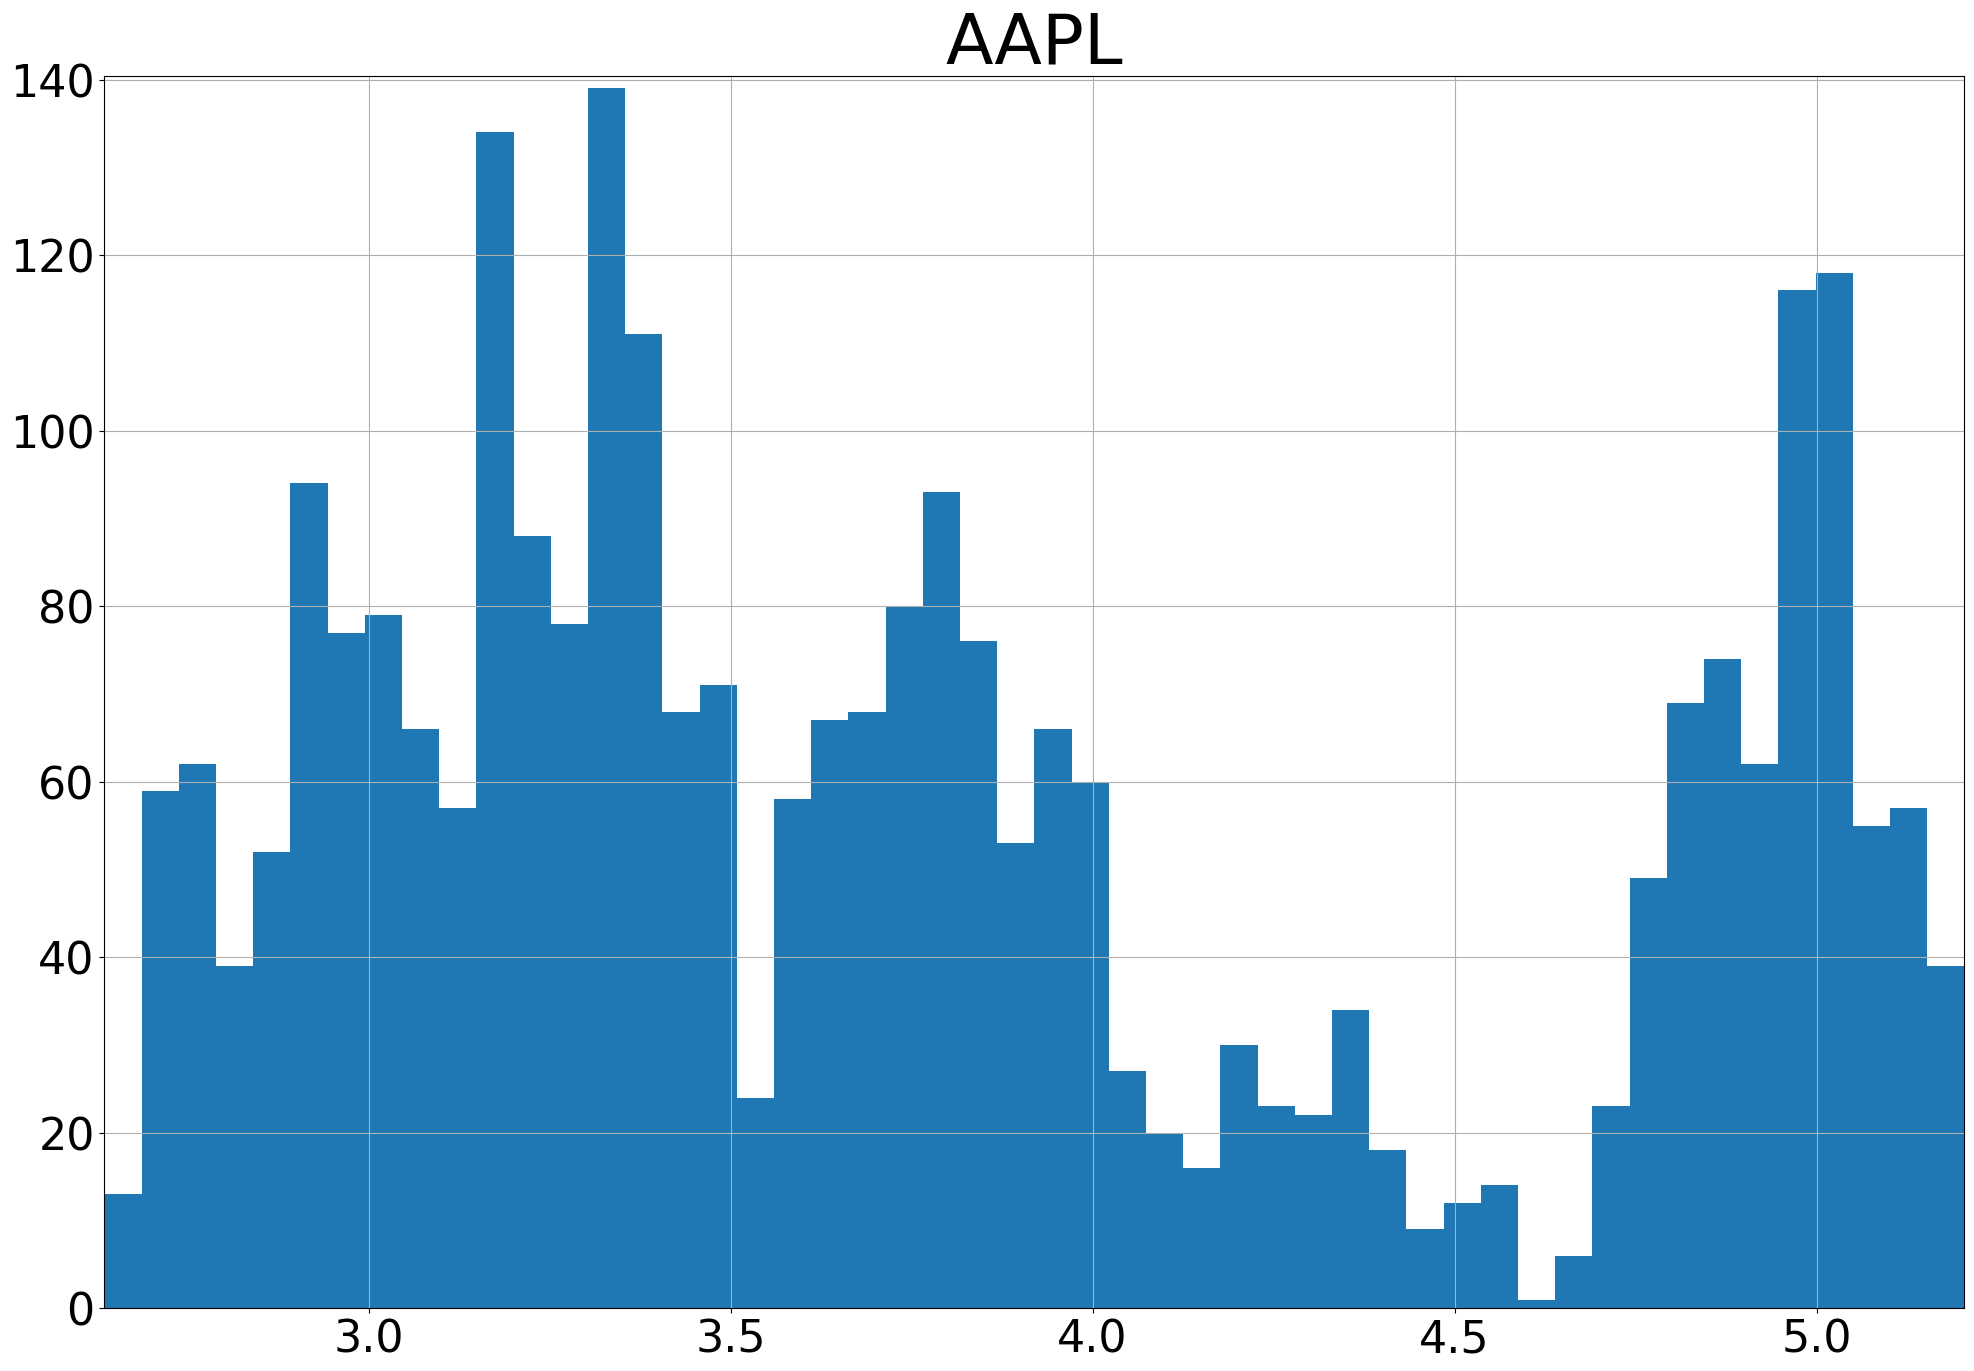

In [18]:
fig, ax = plt.subplots(figsize = (24, 16))
log_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize = 50)

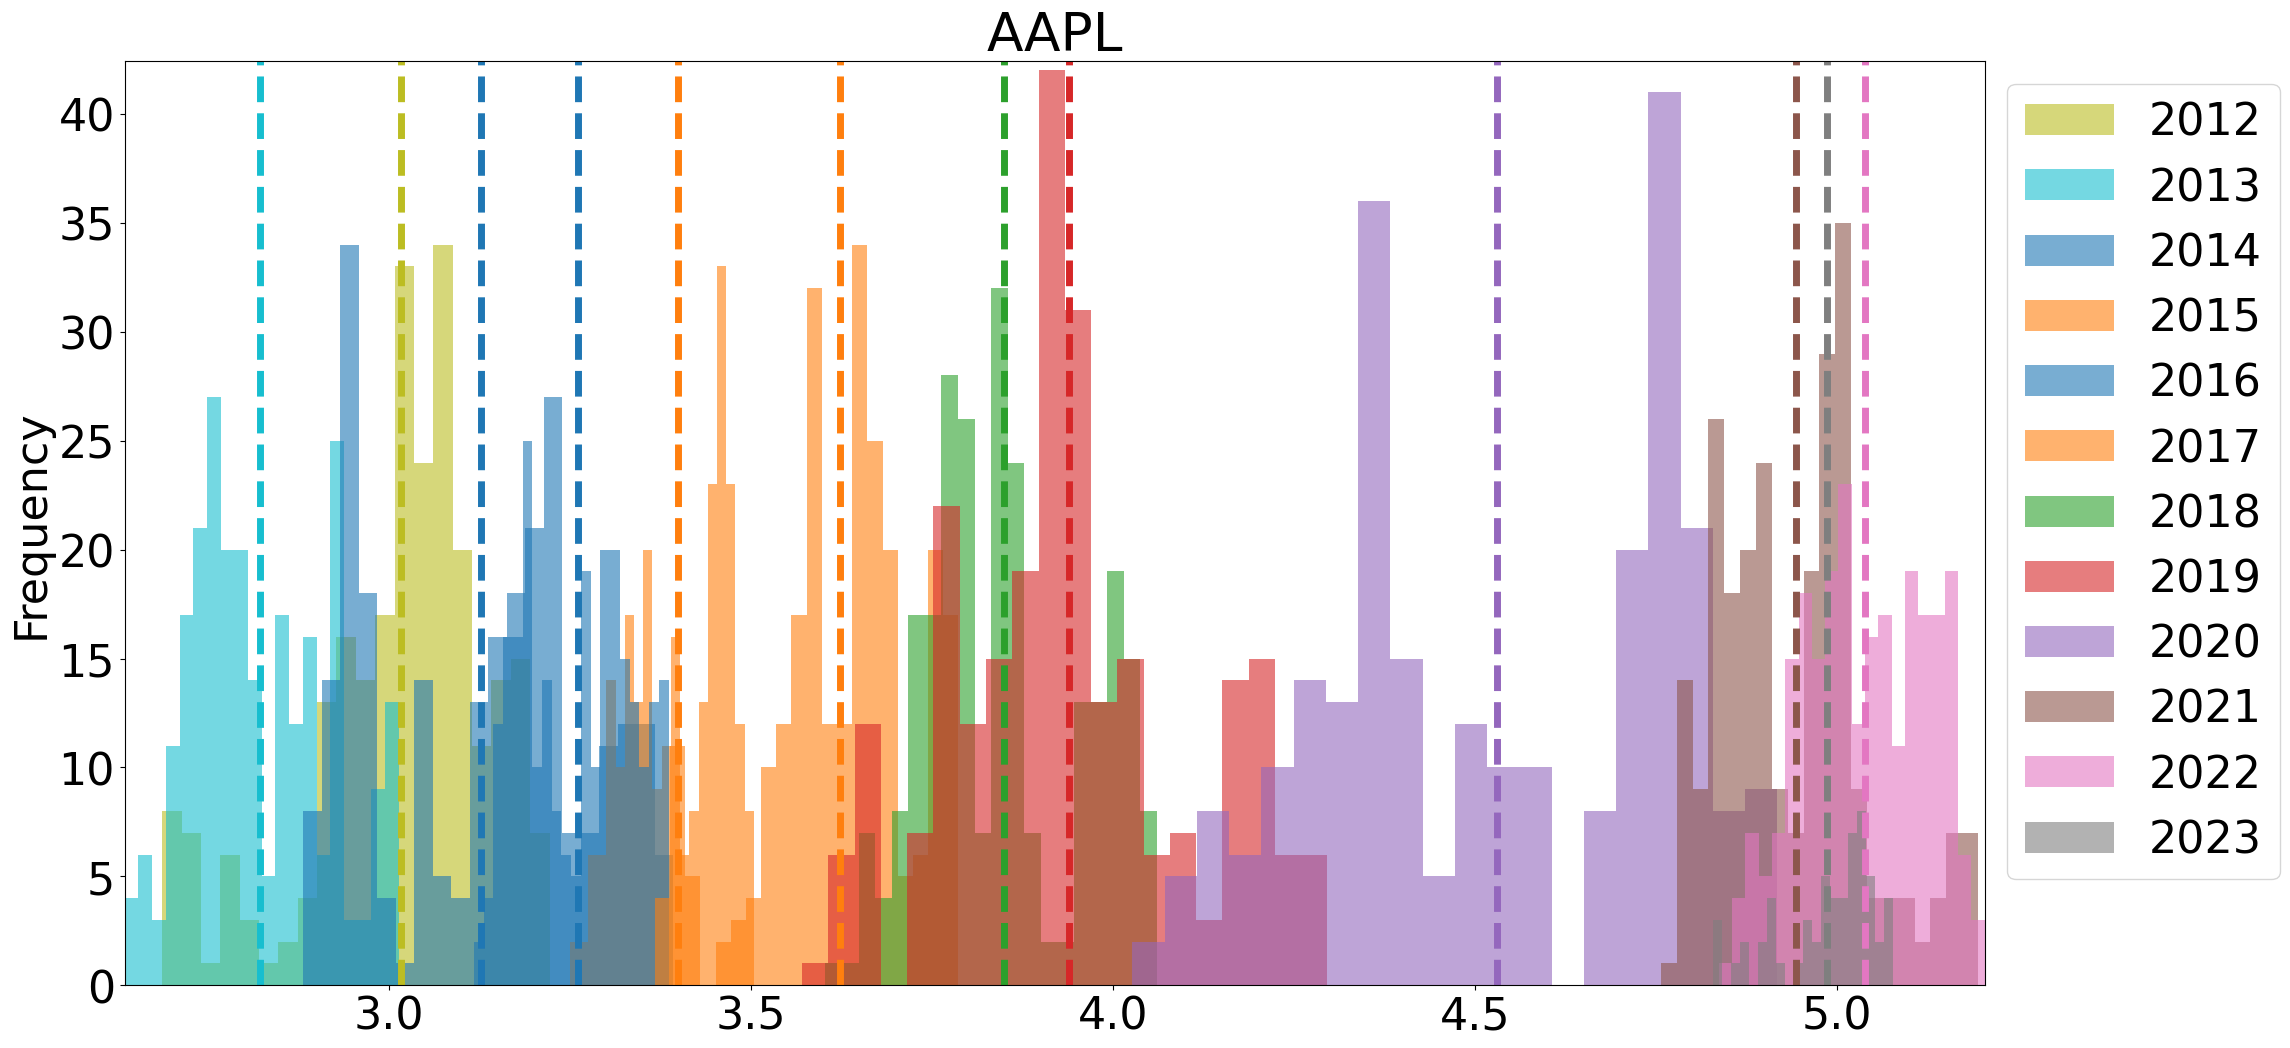

In [19]:
def graph_yearly_distributions(data, stock, figsize = (24,12), density = False):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = figsize)
    for year in years:
        color = "C" + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color, 
                            alpha = .6,
                            label = year,
                            bins = 20,
                            density = density,
                            ax = ax)
        # plot the mean
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
        ax.set_title(stock)
        # set the legend
        ax.legend(bbox_to_anchor = (1,1))
    
graph_yearly_distributions(log_data, stock, density = False)



In [20]:
price_change_data = log_data.diff()
price_change_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264
2012-01-05  0.010167  0.011041 -0.004201 -0.021522
2012-01-06  0.015415  0.010400 -0.002408 -0.007773
2012-01-09 -0.013250 -0.001587  0.004211  0.012556
...              ...       ...       ...       ...
2023-03-21  0.005678  0.011873 -0.007261  0.075292
2023-03-22 -0.005457 -0.009145 -0.000625 -0.033085
2023-03-23  0.019530  0.006945 -0.001390  0.005582
2023-03-24  0.010426  0.008271  0.020172 -0.009461
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326

[2826 rows x 4 columns]

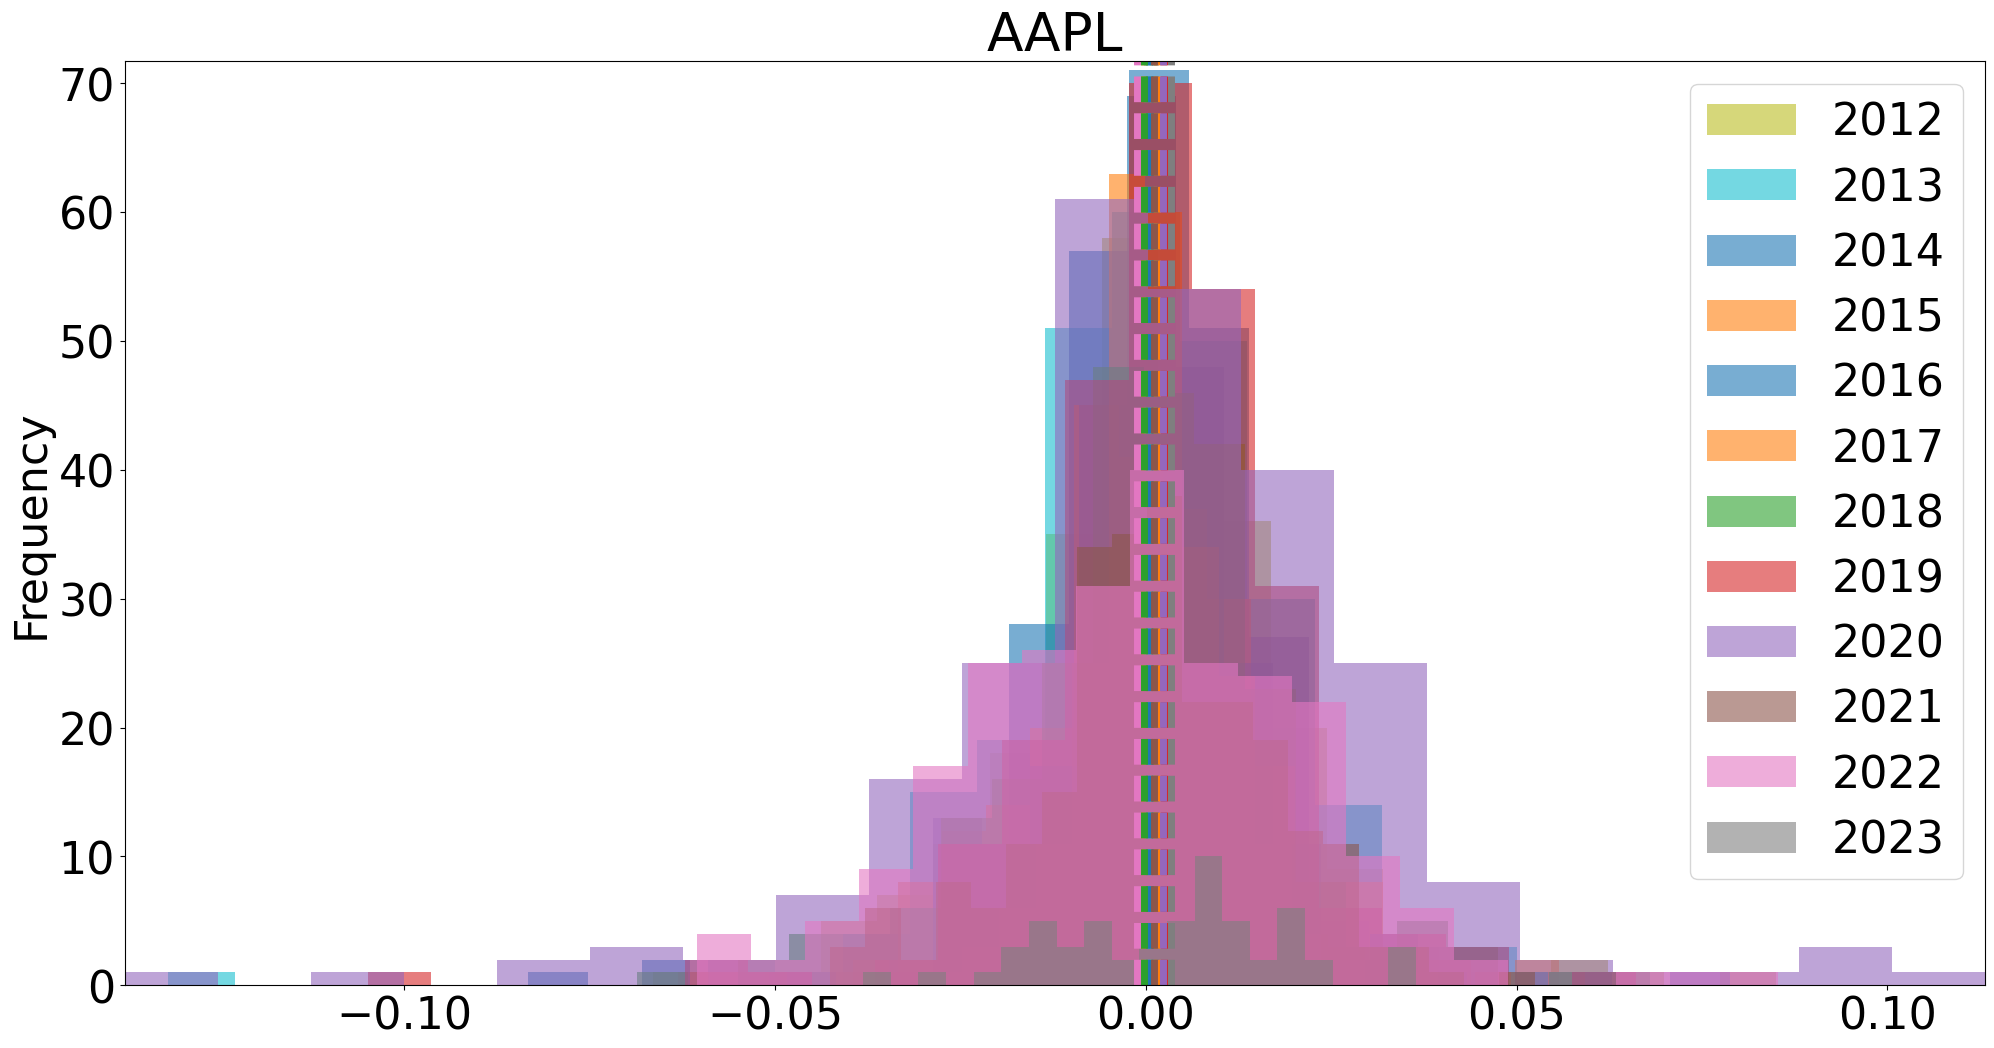

In [21]:
graph_yearly_distributions(price_change_data, stock, density = False)

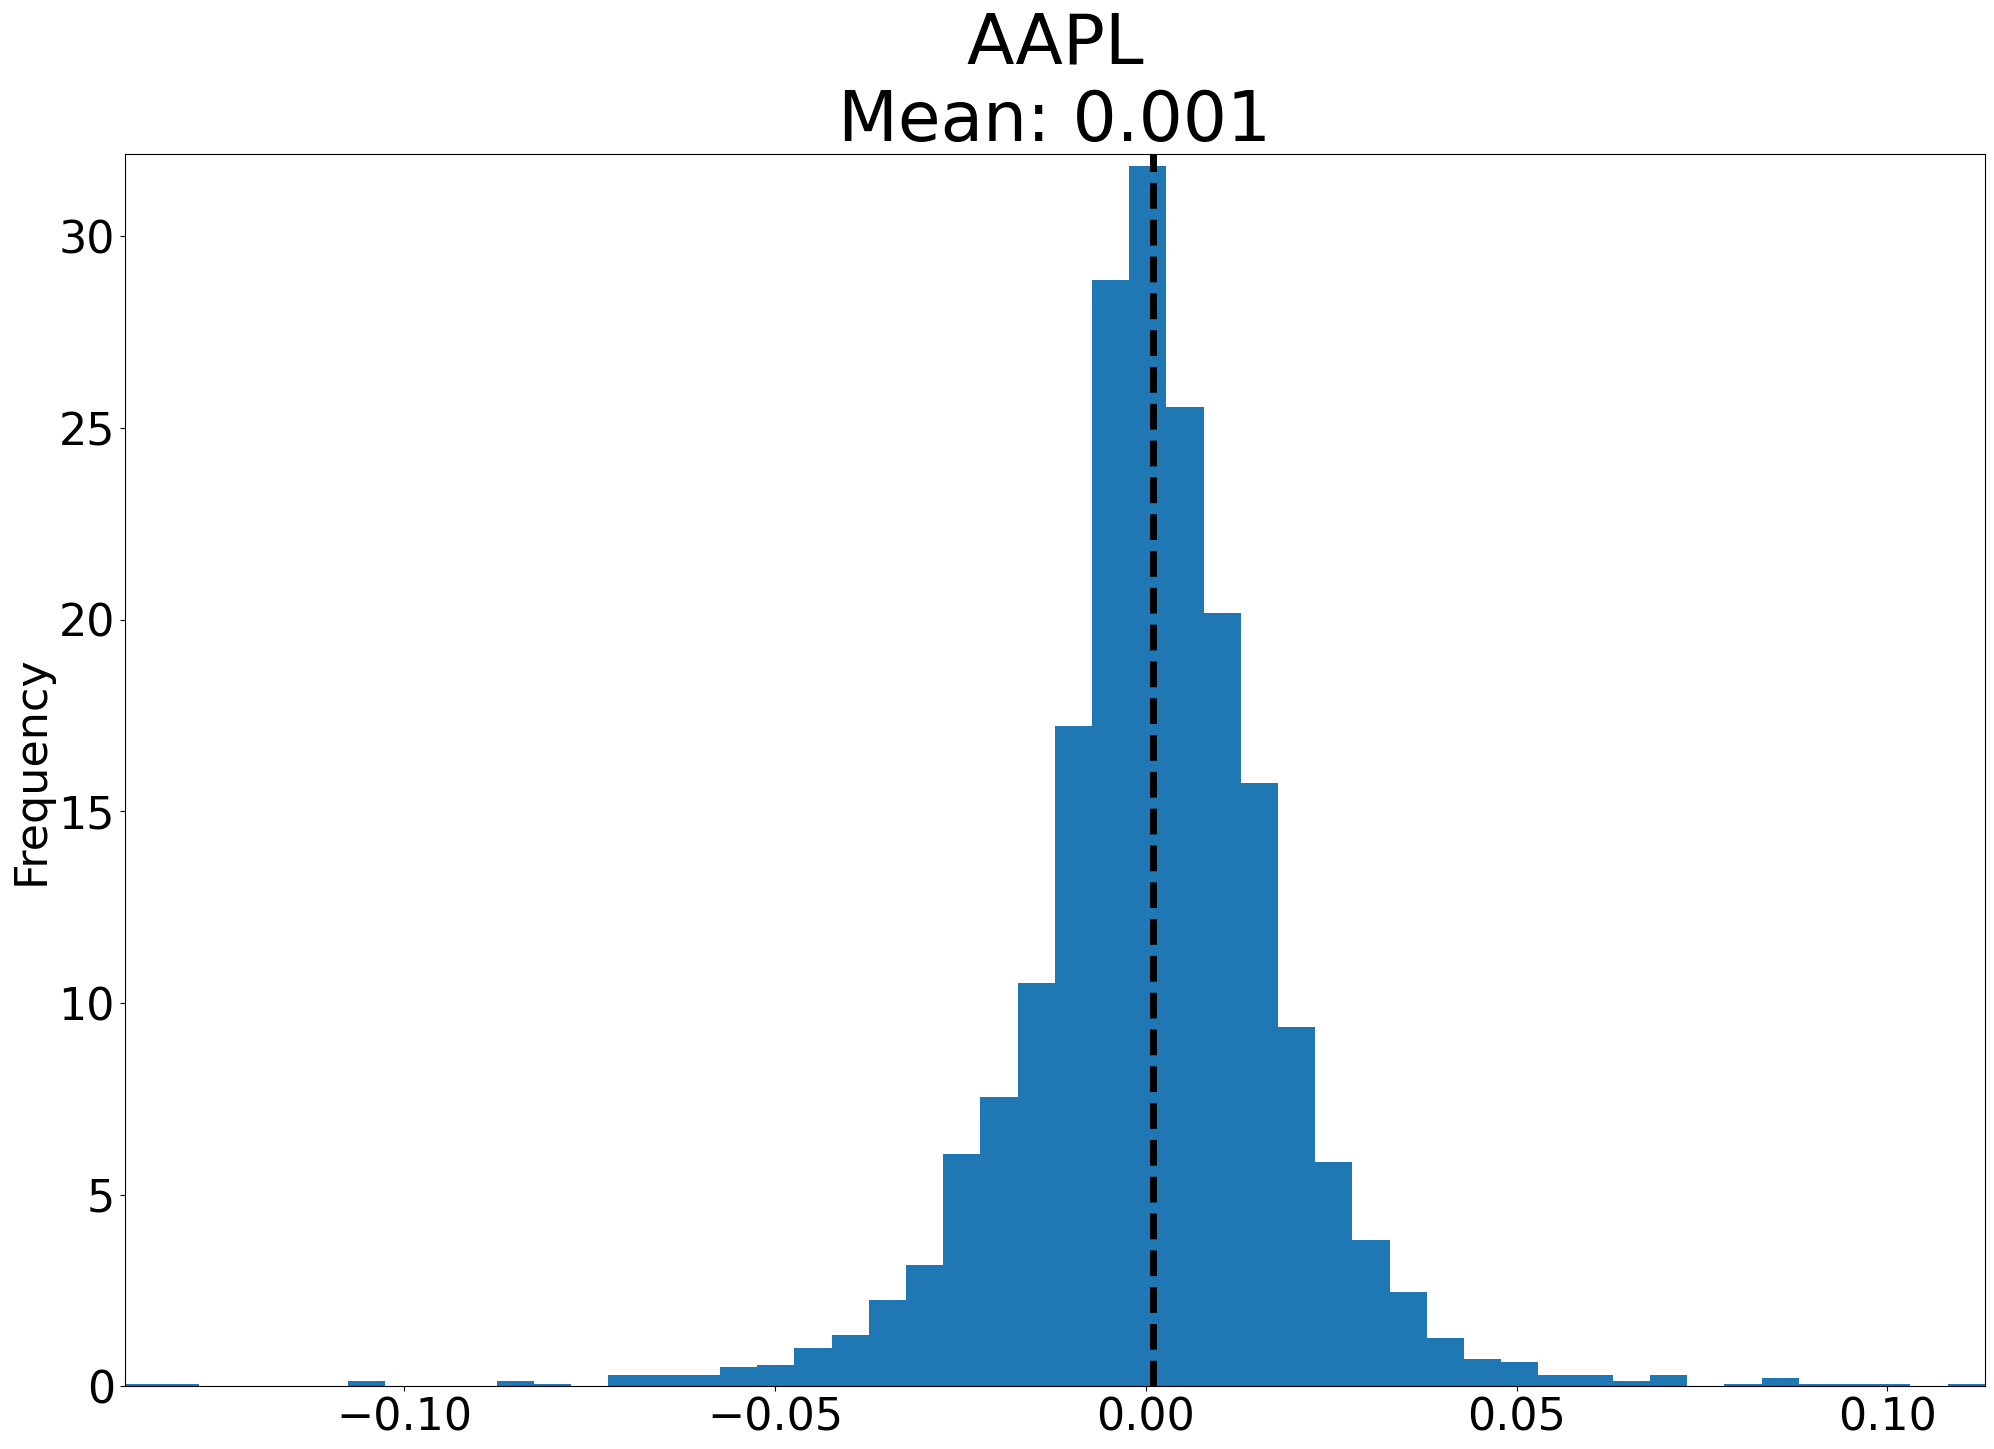

In [22]:
fig, ax = plt.subplots(figsize = (24,16))
stock = "AAPL"
# close_data[stock].hist(bins = 50)
price_change_mean = round(price_change_data[stock].mean(), 3)
price_change_data[stock].dropna().plot.hist(bins = 50, density = True)
ax.set_title(stock + "\nMean: " + str(price_change_mean), fontsize = 50)
ax.axvline(price_change_mean, color = "k", linewidth = 5,
          ls = "--")

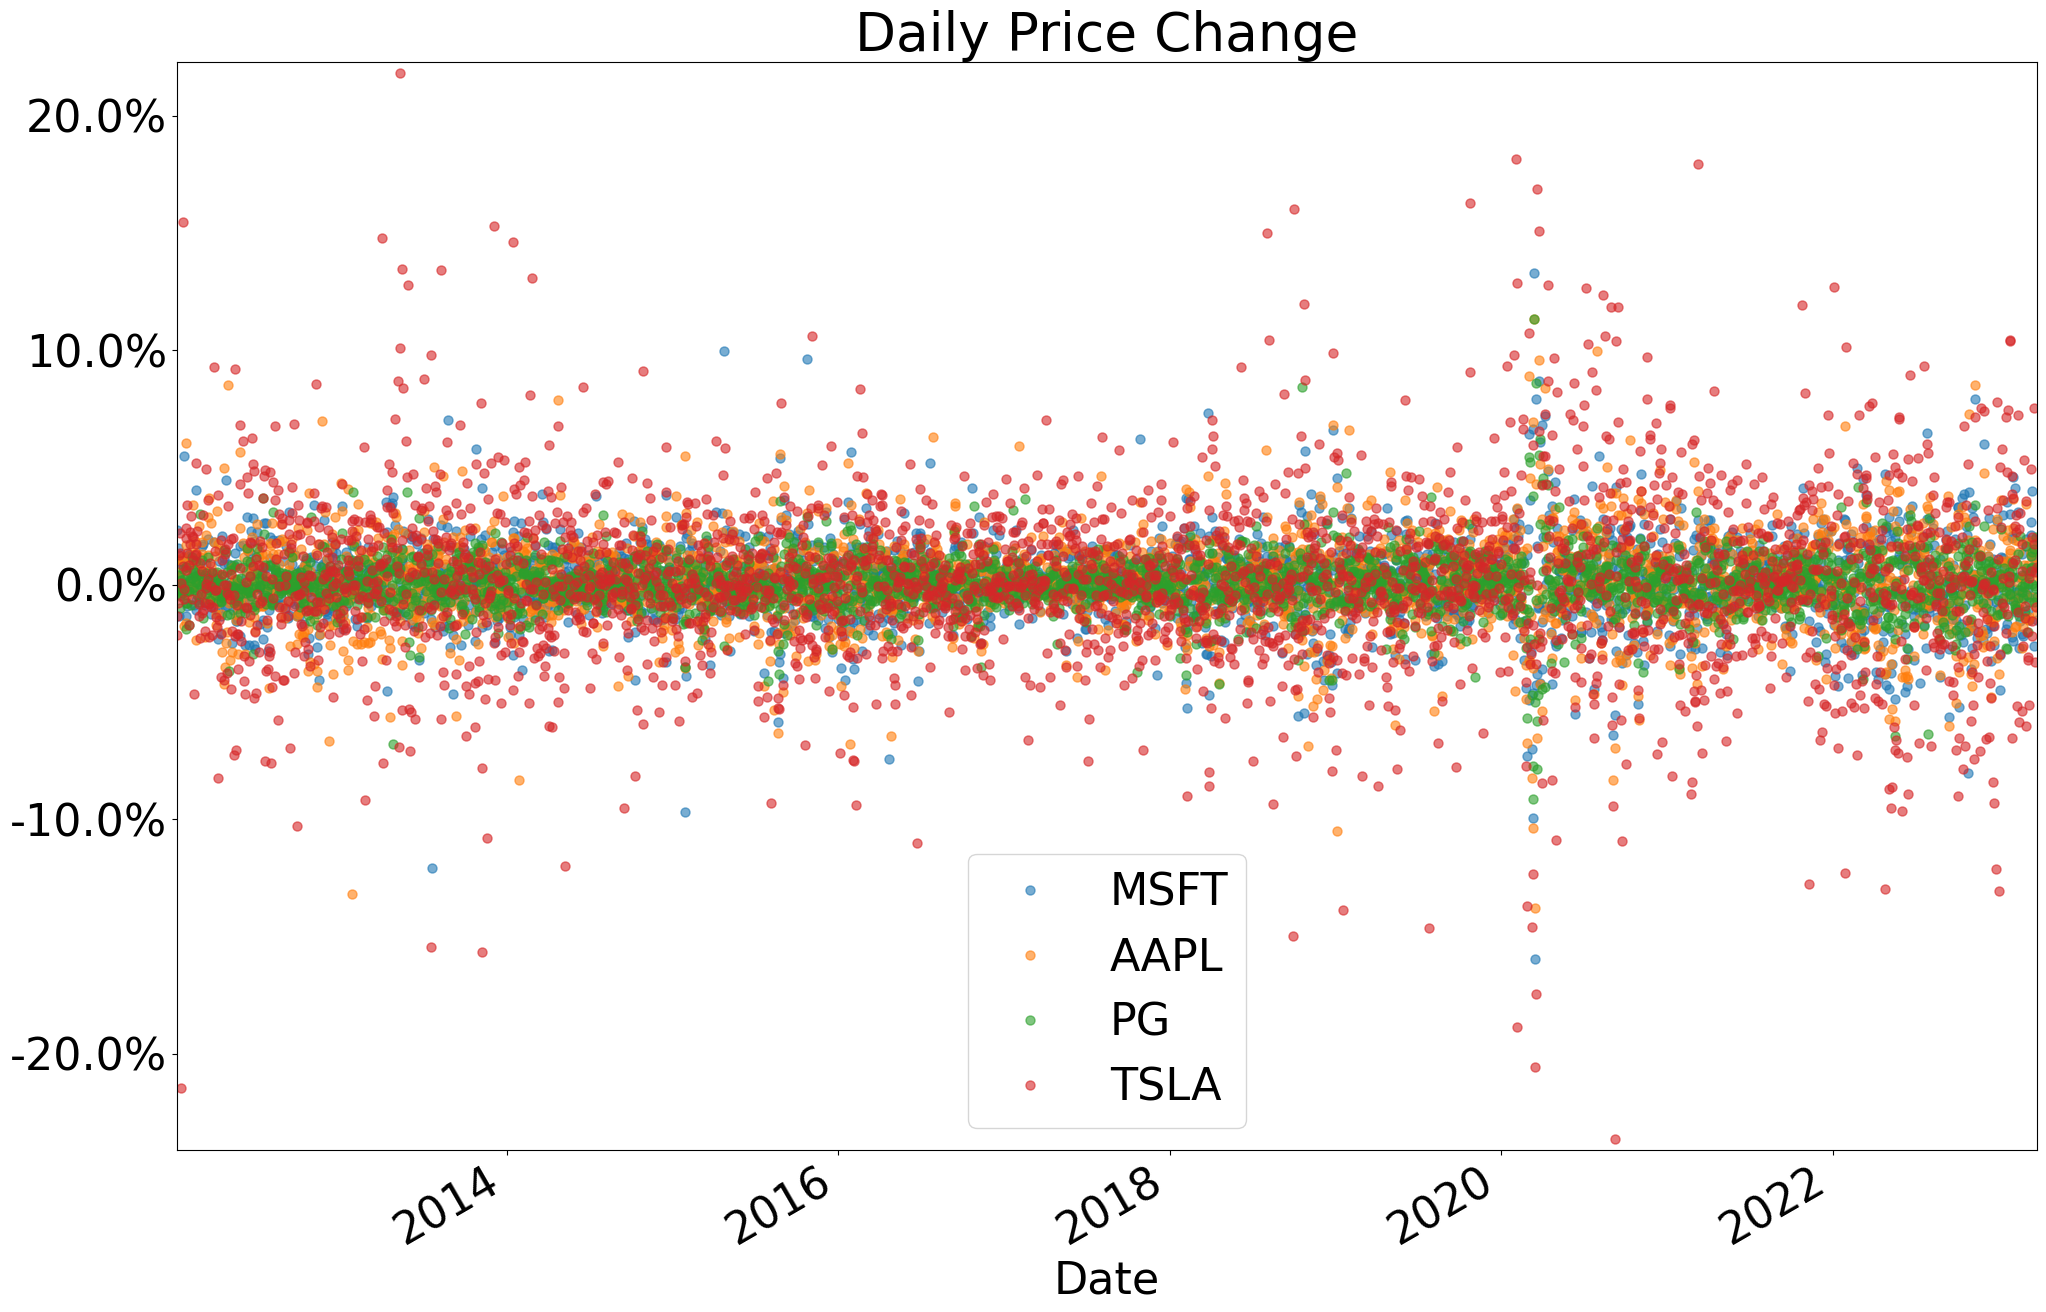

In [23]:
fig, ax = plt.subplots(figsize = (24,16))
# go over each of the keys in data
for key in price_change_data.keys():
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    price_change_data[key].plot.line(marker = ".", 
                                     markersize = 13,
                                     alpha = .6,
                                     ls = "",
                                     ax = ax)
ax.set_title("Daily Price Change")
# access y-axis values
y_vals = ax.get_yticks()
# set ytick labels as % instead of decimal:
ax.set_yticklabels([str(round(y *100, 1)) + "%" for y in y_vals])
plt.legend()

array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'AAPL'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'TSLA'}>]], dtype=object)

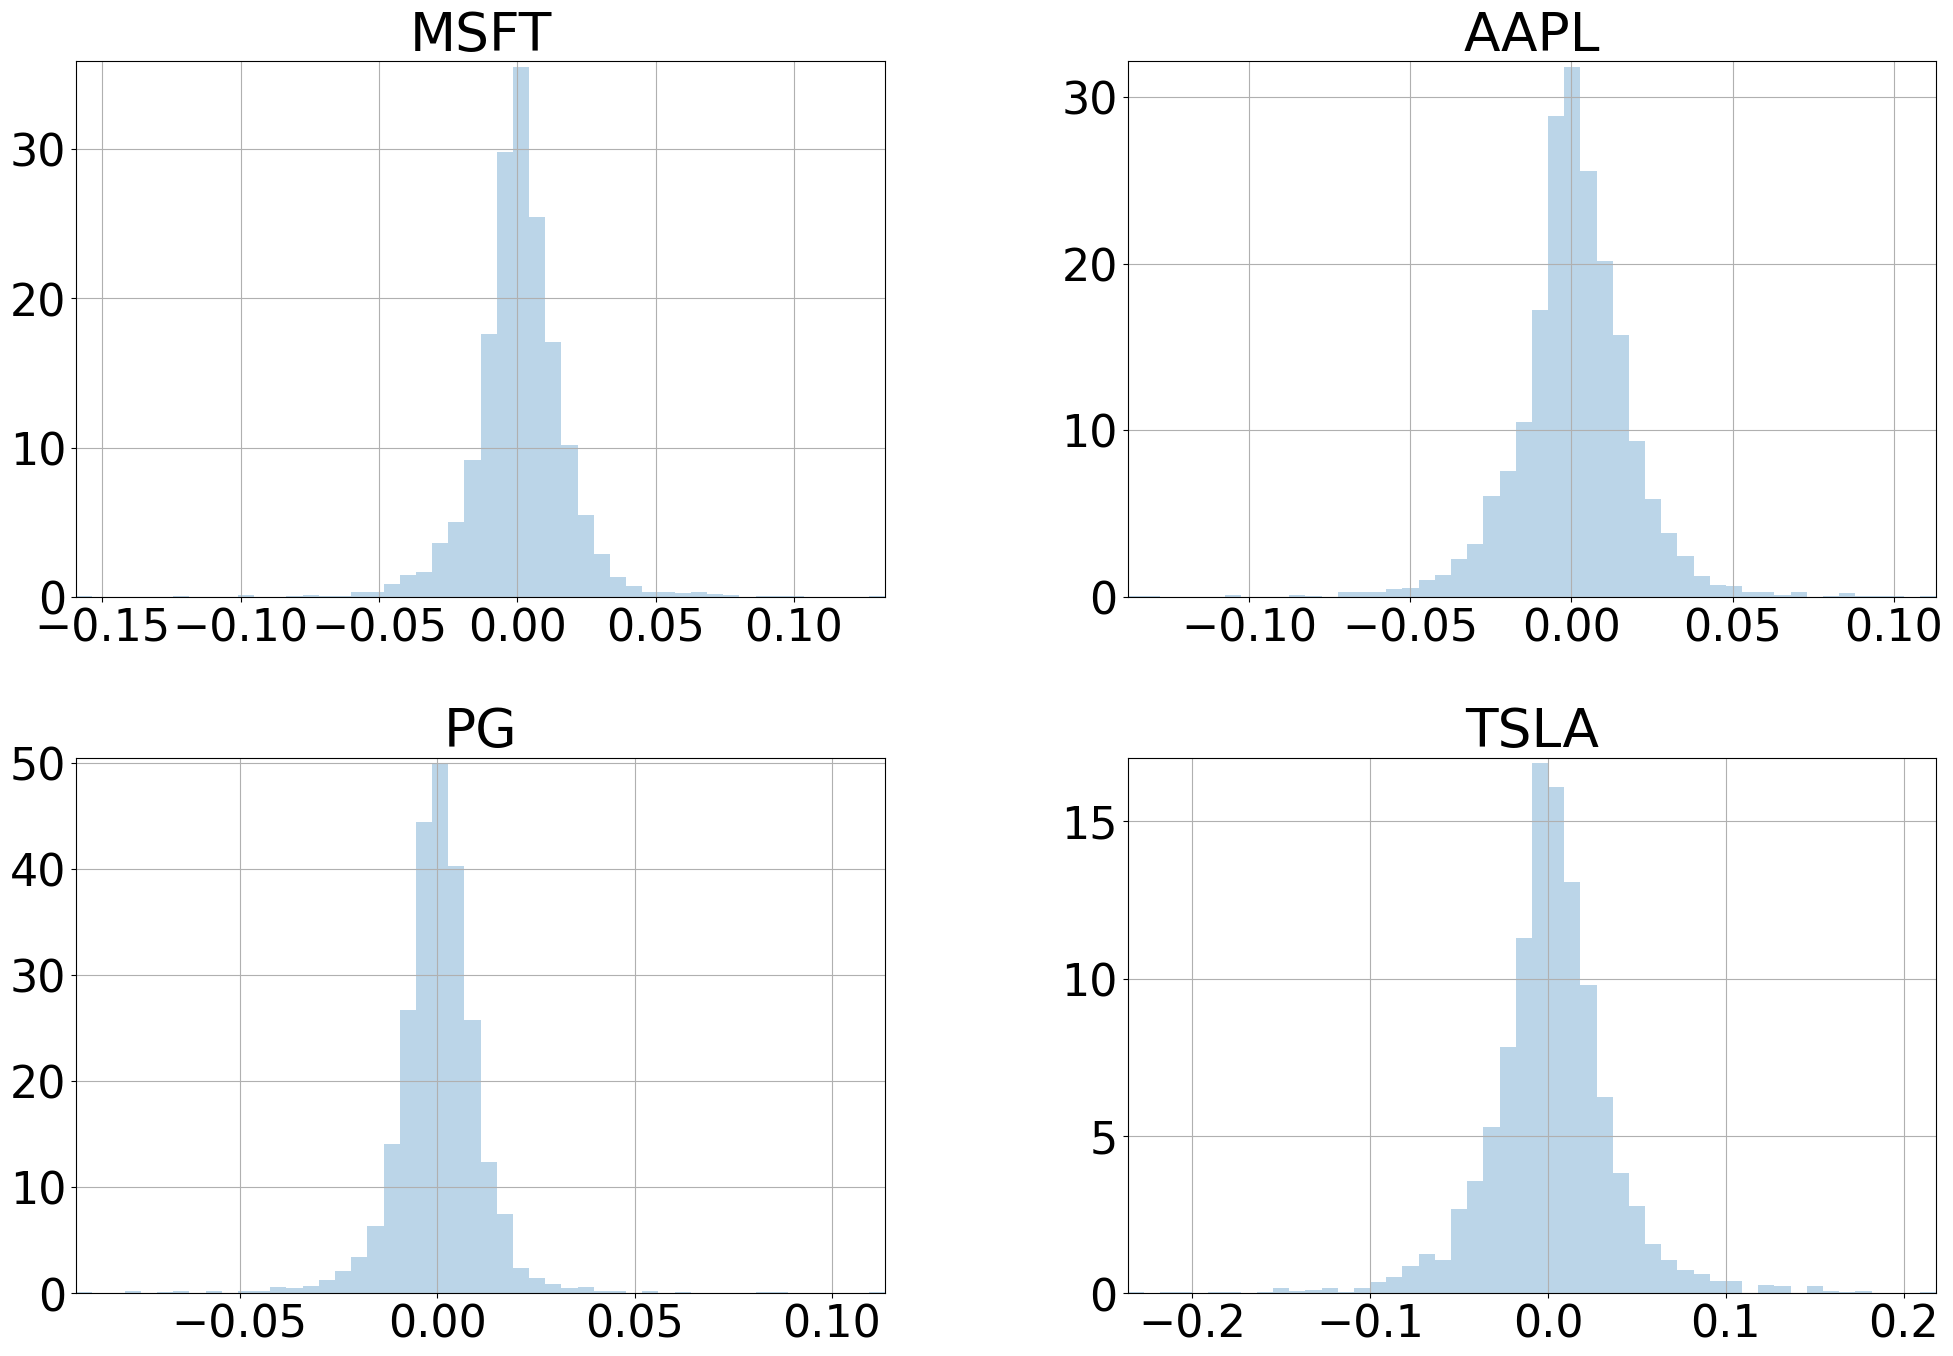

In [24]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50,
                      alpha = .3,
                      label = price_change_data.keys(),
                      ax = ax,
                      density = True)


In [25]:
from stats import *
stats_df = gather_statistics(price_change_data.mul(100),
                             sample = True).round(2)
stats_df

MSFT  AAPL     PG   TSLA
mean       0.08  0.08   0.03   0.16
median     0.06  0.08   0.04   0.14
variance   2.82  3.35   1.29  12.86
s.d.       1.68  1.83   1.13   3.59
skewness  -0.22 -0.28  -0.04  -0.05
kurtosis  11.71  8.71  15.00   8.05

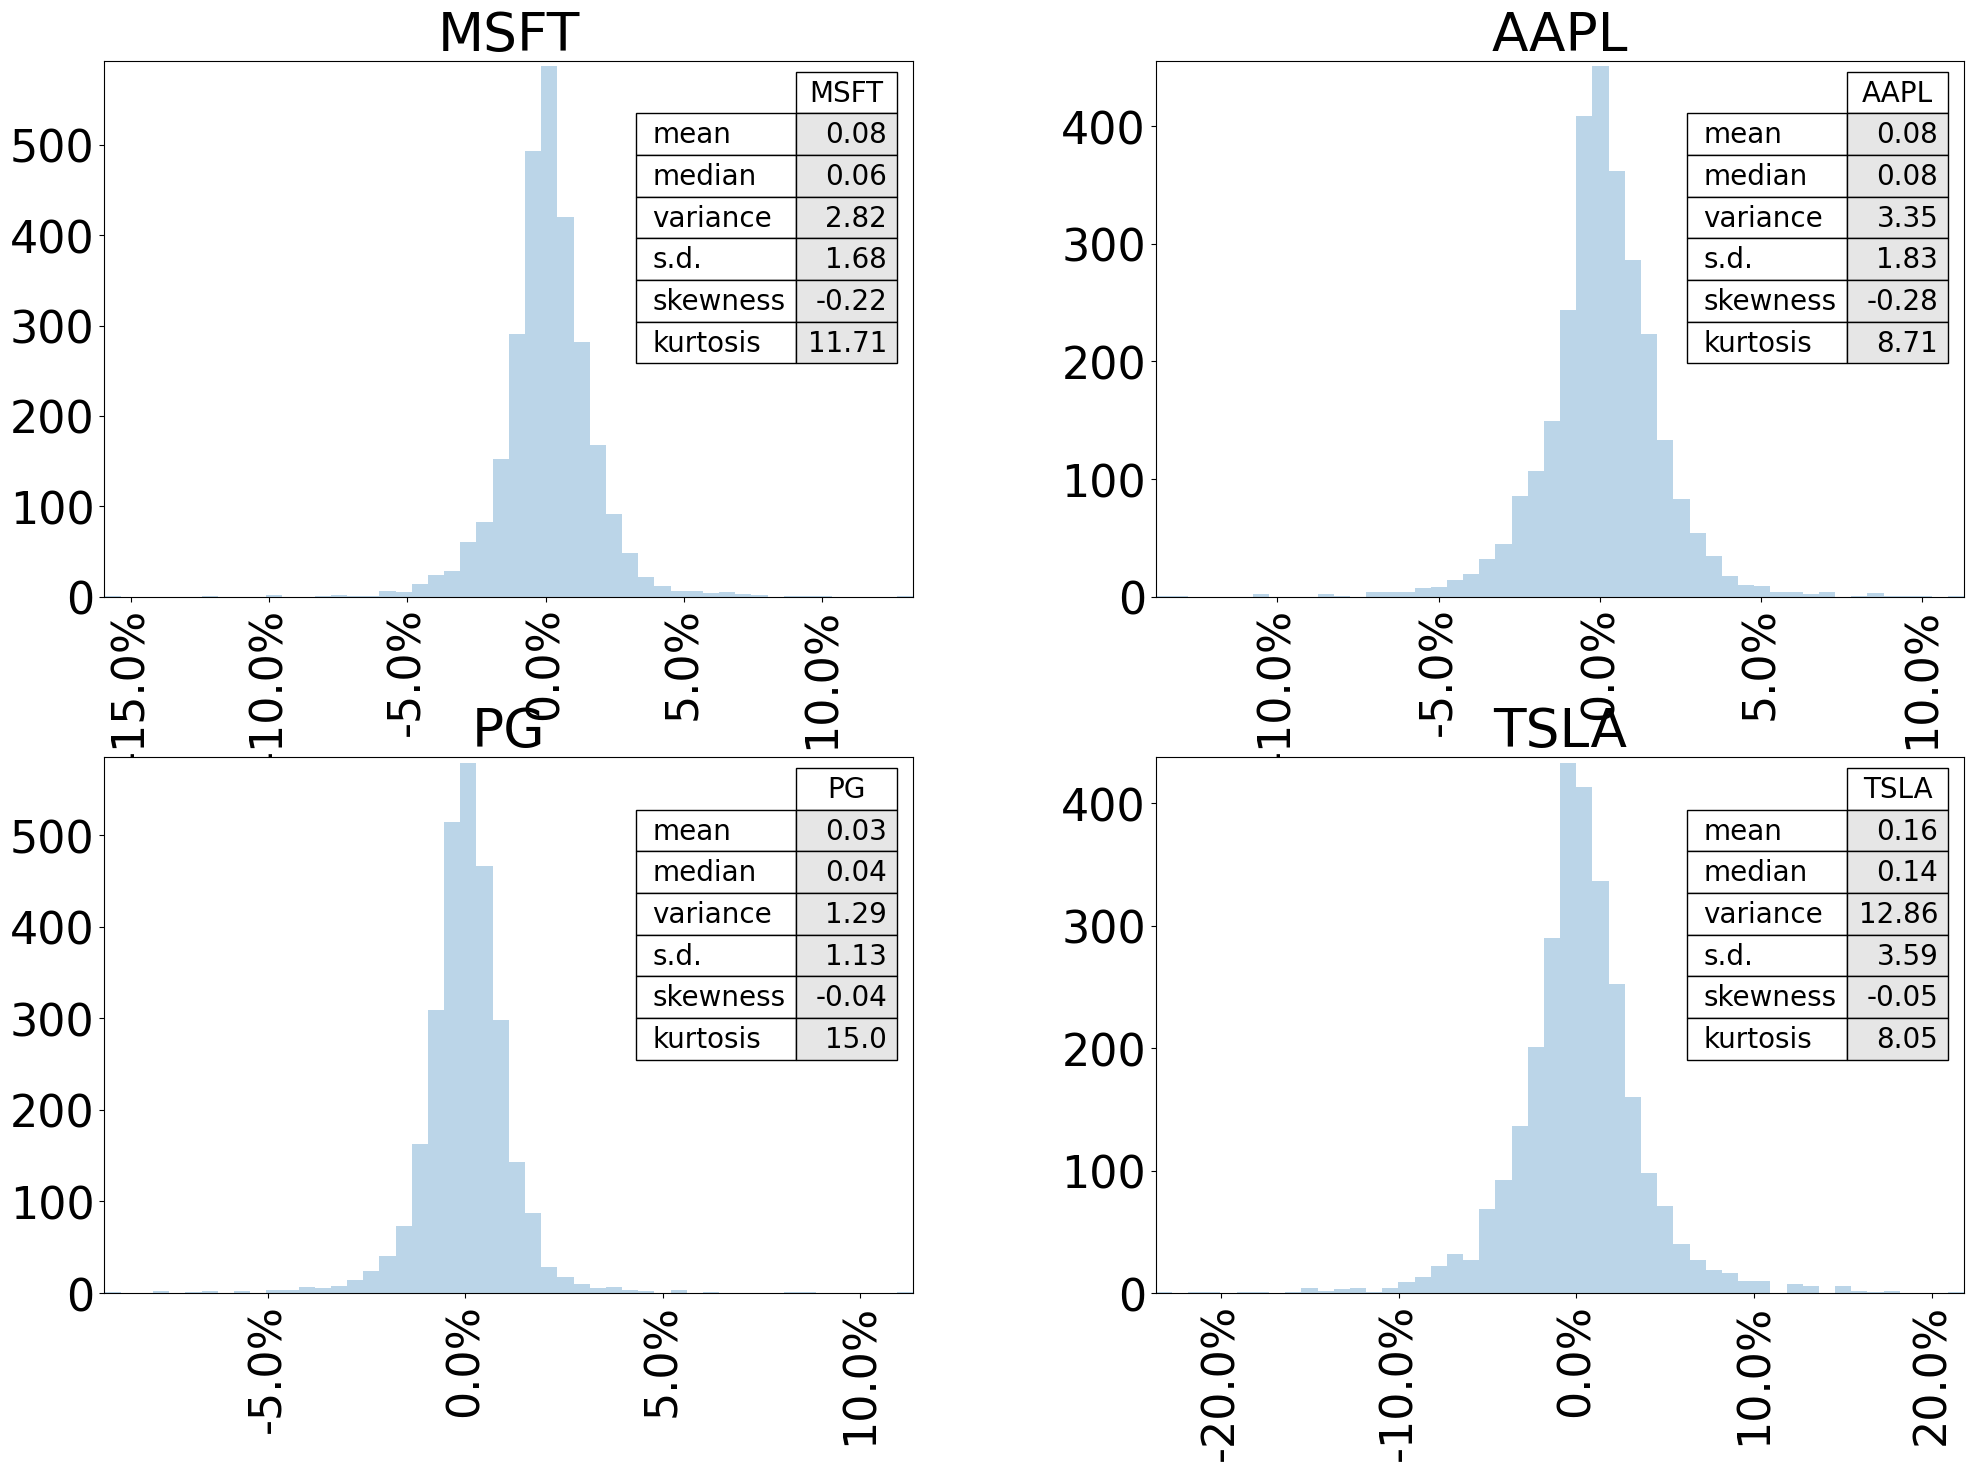

In [26]:
from pandas.plotting import table

# axs is a list of lists
# sublists contain relevant axes that comprise the multiplot
fig, axs = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                      alpha = .3,
                      label = price_change_data.keys(),
                      ax = axs,
                      density = False)
# adjust the xtick labels in a multiplot by using a for loop to access
# sublists
for sublist in axs:
# and to access elements in each sublist
    for ax in sublist:
        x_vals = ax.get_xticks()
        ax.set_xticklabels([str(round(x *100, 1)) + "%" for x in x_vals],
                         rotation = 90)
        
        
        stock = ax.get_title()
        hist_data = stats_df[stock]
        stats = table(ax, hist_data,
                     colWidths = [.1],
                     cellColours = [[(.9,.9,.9)]] * 6,
                     loc = "upper right")
        stats.scale(1.25, 2.5)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        ax.grid(False)
        
        

In [27]:
# measure data in terms of standard deviations
price_change_data.div(price_change_data.std())

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  1.384797  0.292693 -0.039586 -0.369806
2012-01-05  0.605277  0.602940 -0.370351 -0.600015
2012-01-06  0.917712  0.567920 -0.212320 -0.216721
2012-01-09 -0.788808 -0.086690  0.371232  0.350047
...              ...       ...       ...       ...
2023-03-21  0.337998  0.648405 -0.640205  2.099112
2023-03-22 -0.324879 -0.499416 -0.055089 -0.922398
2023-03-23  1.162652  0.379283 -0.122556  0.155627
2023-03-24  0.620683  0.451695  1.778536 -0.263765
2023-03-27 -0.895760 -0.675498 -0.463934  0.204235

[2826 rows x 4 columns]

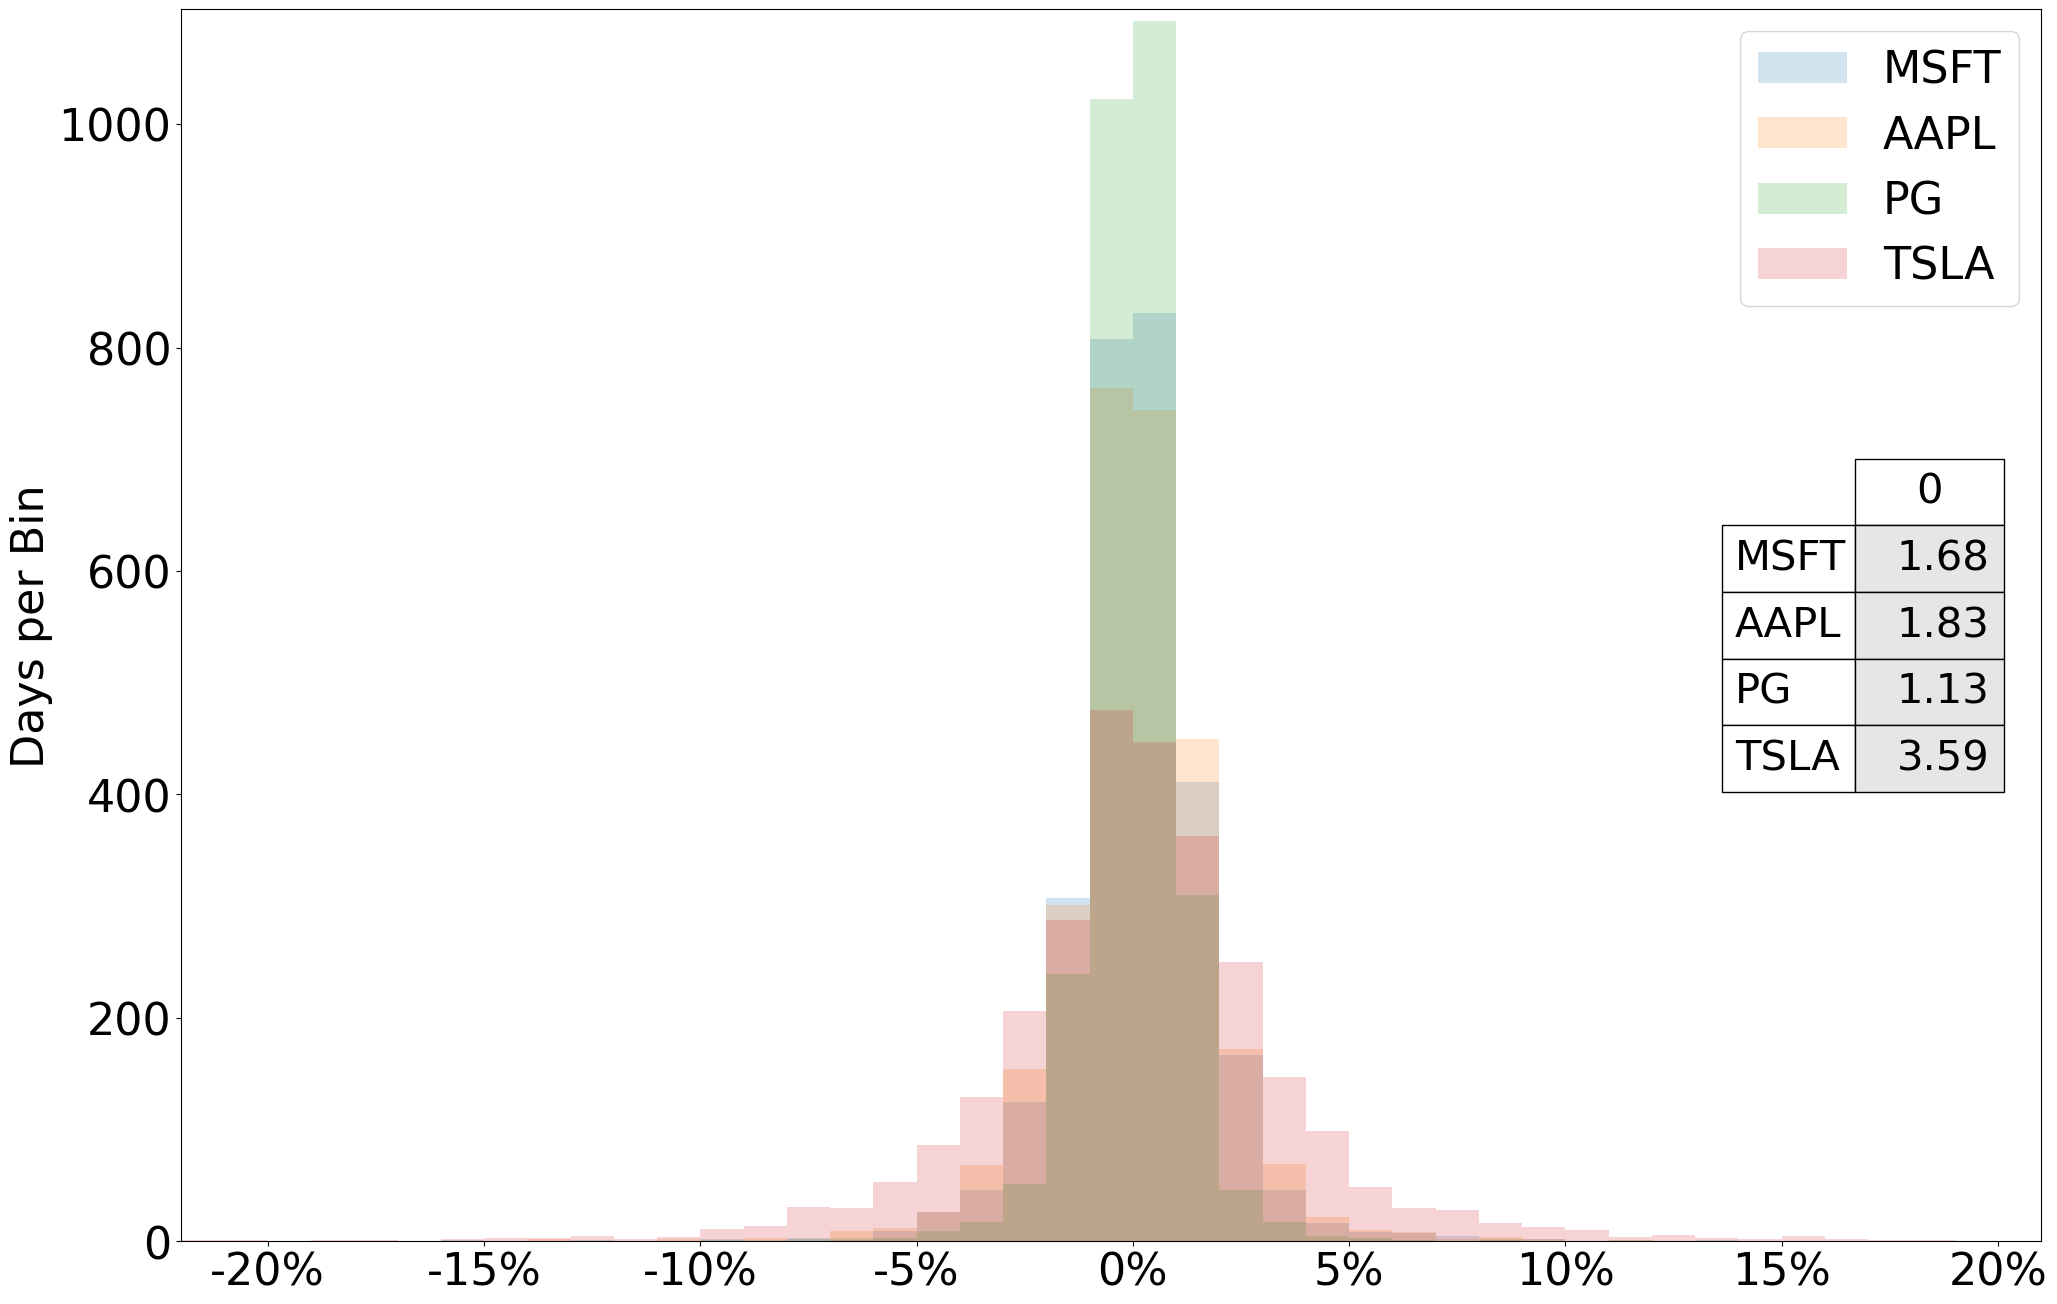

In [28]:
plot_data = price_change_data.mul(100)
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # set bins to be length of 1%
    plot_data[key].hist(bins = [x for x in range(-22, 22, 1)],
                               alpha = .2,
                               label = key,
                               density = False,
                               ax = ax)
    ax 
ax.set_ylabel("Days per Bin")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
std_df = round(plot_data.std(),2)
# std_df.rename(columns = {0:"SD"}, inplace = True)
stats = table(ax,
             round(plot_data.std(), 2),
             colWidths = [.1],
             cellColours= [[(.9,.9,.9)]]* 4,
             loc = "center right")
stats.scale(.8, 4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

In [29]:
plot_data.std()

MSFT    1.679750
AAPL    1.831165
PG      1.134200
TSLA    3.586861
dtype: float64

In [30]:
# measure data in terms of standard deviations
norm_plot_data = price_change_data.div(price_change_data.std())
norm_plot_data 


MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  1.384797  0.292693 -0.039586 -0.369806
2012-01-05  0.605277  0.602940 -0.370351 -0.600015
2012-01-06  0.917712  0.567920 -0.212320 -0.216721
2012-01-09 -0.788808 -0.086690  0.371232  0.350047
...              ...       ...       ...       ...
2023-03-21  0.337998  0.648405 -0.640205  2.099112
2023-03-22 -0.324879 -0.499416 -0.055089 -0.922398
2023-03-23  1.162652  0.379283 -0.122556  0.155627
2023-03-24  0.620683  0.451695  1.778536 -0.263765
2023-03-27 -0.895760 -0.675498 -0.463934  0.204235

[2826 rows x 4 columns]

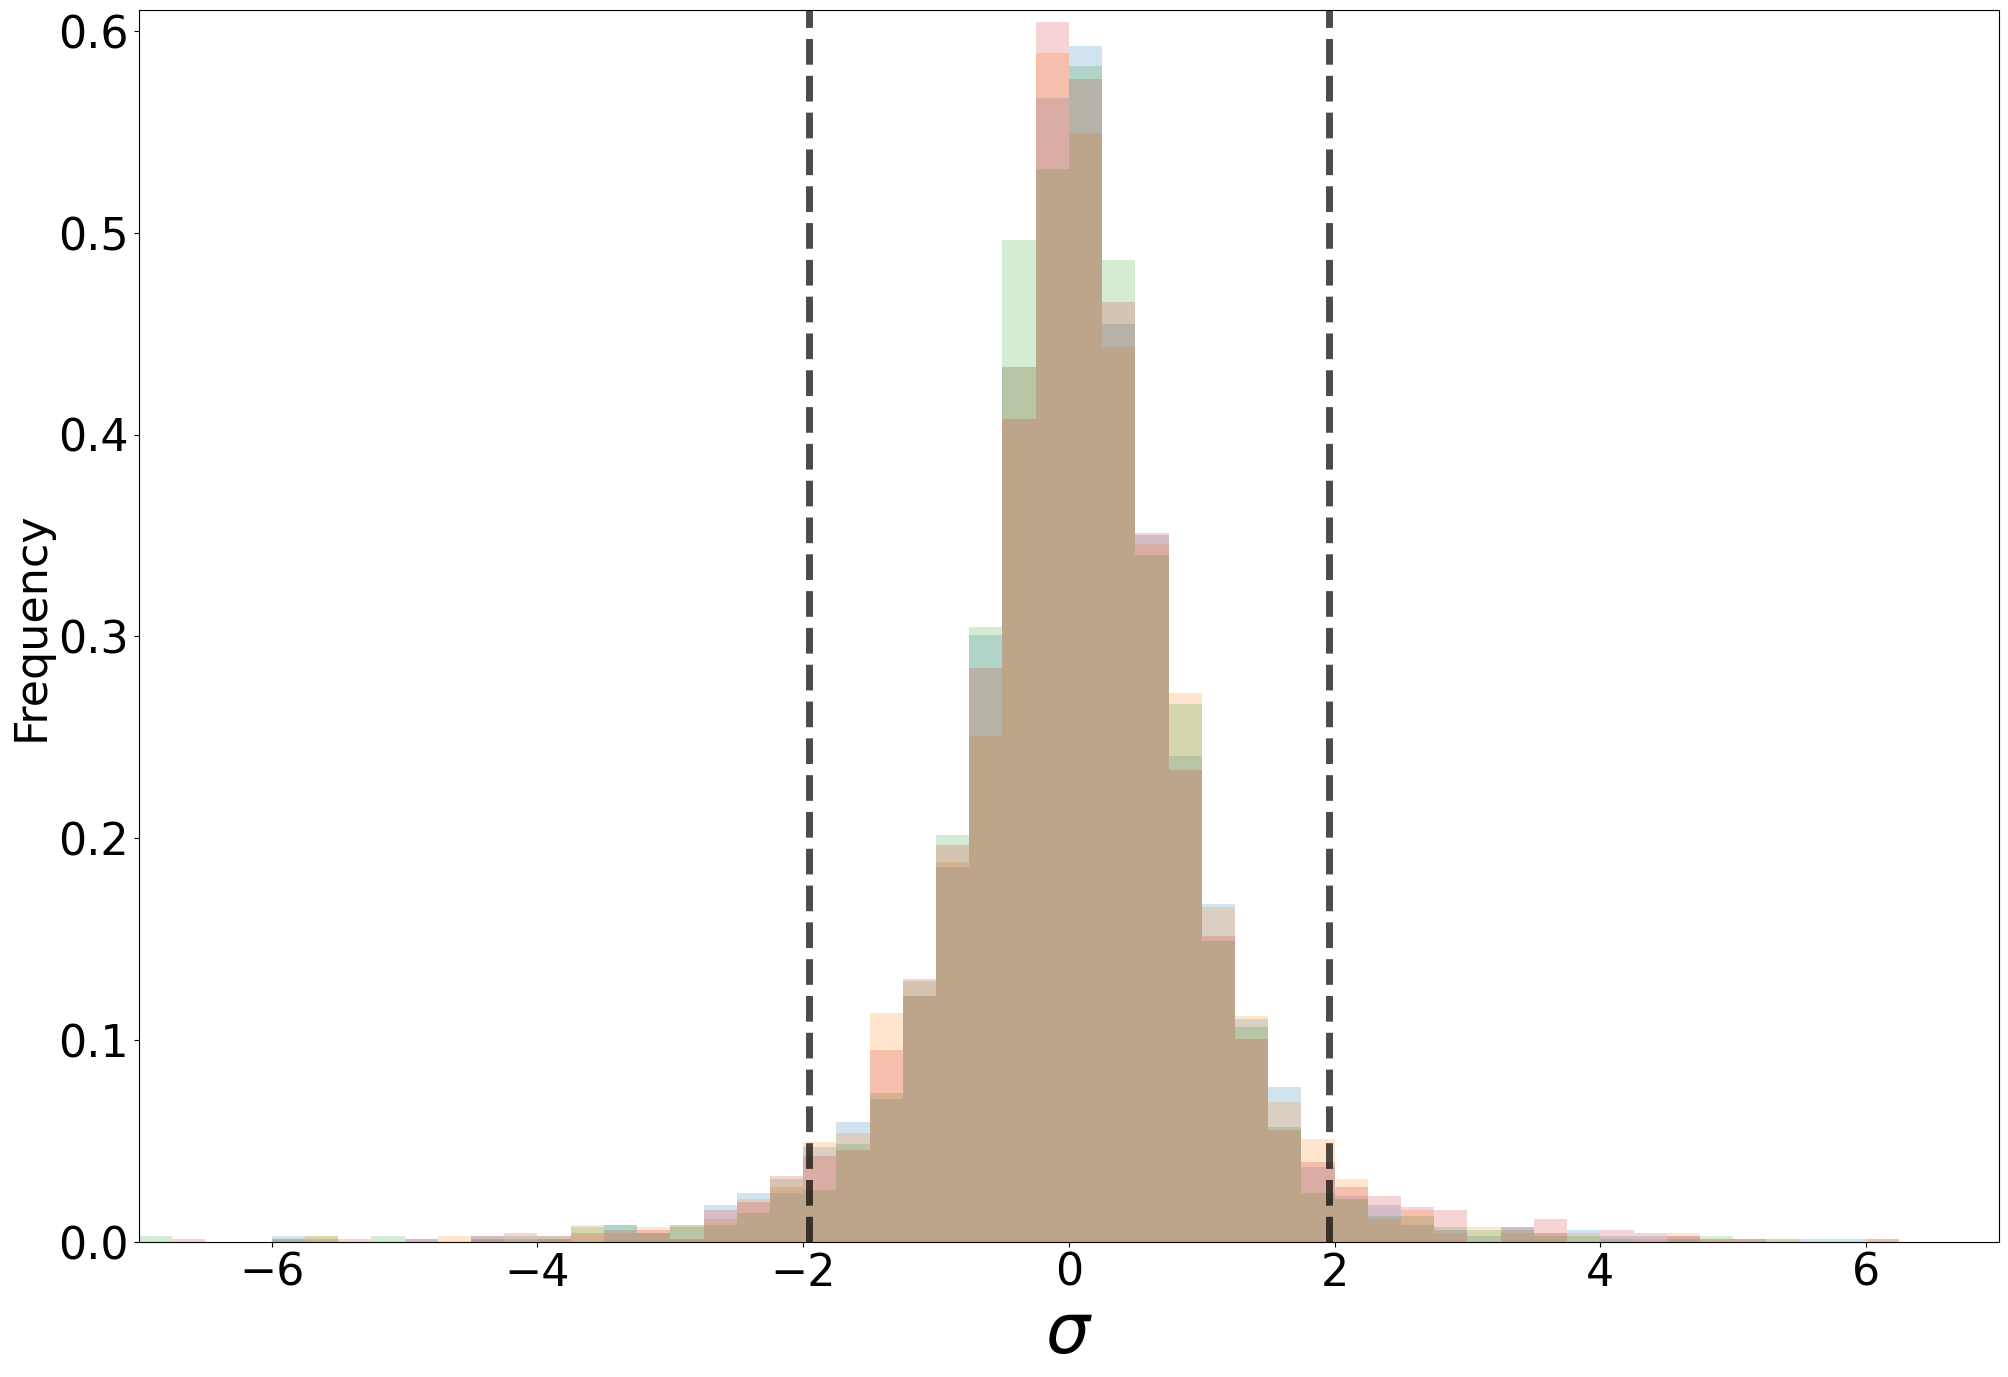

In [31]:
# replot after normalizing data by standard deviation

fig, ax = plt.subplots(figsize = (24,16))
for key in norm_plot_data:
    # set bins to be length of 1%
    norm_plot_data[key].hist(bins = [x / 4 for x in range(-28, 29, 1)],
                               alpha = .2,
                               label = key,
                             # setting density True shows frequency
                             # by units of SDs
                               density = True,
                               ax = ax)
    ax 
ax.set_ylabel("Frequency")
ax.set_xlabel("$\sigma$", fontsize = 50)

# add vertical lines to show standard deviations:
# if this is a normal distribution, 95% of the body of the distribution
# should lie between -1.96 and 1.96 SDs from the mean 
ax.axvline(-1.96, linewidth = 5, ls = "--", color = "k", alpha = .7)
ax.axvline(1.96, linewidth = 5, ls = "--", color = "k", alpha = .7)
# get rid of background grid:
ax.grid(False)

Beta: measure of volatility; as beta goes up, return goes up; a way of measuring risk

### $\beta$ and Volatility

By plotting distributions of specific stocks, we have casually shown that TSLA is relatively volatile compared to PG, MSFT, and AAPL. Yet, how would we compare this volatility to the *average* volatility in the market? In finance, the relative volatility of a stock is referred to as it's $\beta$ (_beta_). $\beta$ is unique for each security in a portfolio. It is a weight that describes the sensitivity of that security to market changes. $\beta$ is generally found using past market data, where average market performance is indicated by the S&P500.A $\beta$ for a given security, $i$, can be found by taking the ratio of the covariance between the returns from that security and the market returns, and the variance of the market returns. This will quantify relative volatility of a security: 
<h3 align="center">
    <font size="5">
        $ \beta_i = \frac{Cov(r_i,r_m)}{Var(r_m)}$
    </font>
</h3>

In [32]:
price_change_data["S&P 500"] = web.get_data_yahoo("^GSPC",
                                                 start = start,
                                                 end = end)["Close"]

[*********************100%***********************]  1 of 1 completed


In [33]:
# log the S&P 500 data 
price_change_data["S&P 500"] = np.log(price_change_data["S&P 500"]).diff()
price_change_data

MSFT      AAPL        PG      TSLA   S&P 500
Date                                                        
2012-01-03       NaN       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264  0.000188
2012-01-05  0.010167  0.011041 -0.004201 -0.021522  0.002939
2012-01-06  0.015415  0.010400 -0.002408 -0.007773 -0.002540
2012-01-09 -0.013250 -0.001587  0.004211  0.012556  0.002259
...              ...       ...       ...       ...       ...
2023-03-21  0.005678  0.011873 -0.007261  0.075292  0.012899
2023-03-22 -0.005457 -0.009145 -0.000625 -0.033085 -0.016600
2023-03-23  0.019530  0.006945 -0.001390  0.005582  0.002980
2023-03-24  0.010426  0.008271  0.020172 -0.009461  0.005624
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326  0.001646

[2826 rows x 5 columns]

In [34]:
def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True)
    market_var = variance(df[market_key], sample = True)
    beta = stock_cov / market_var
    
    return beta
    
betas = {}
for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, "S&P 500")
pd.DataFrame(betas, index = ["$\\beta$"]).T

$\beta$
MSFT  1.188785
AAPL  1.173157
PG    0.582419
TSLA  1.447236

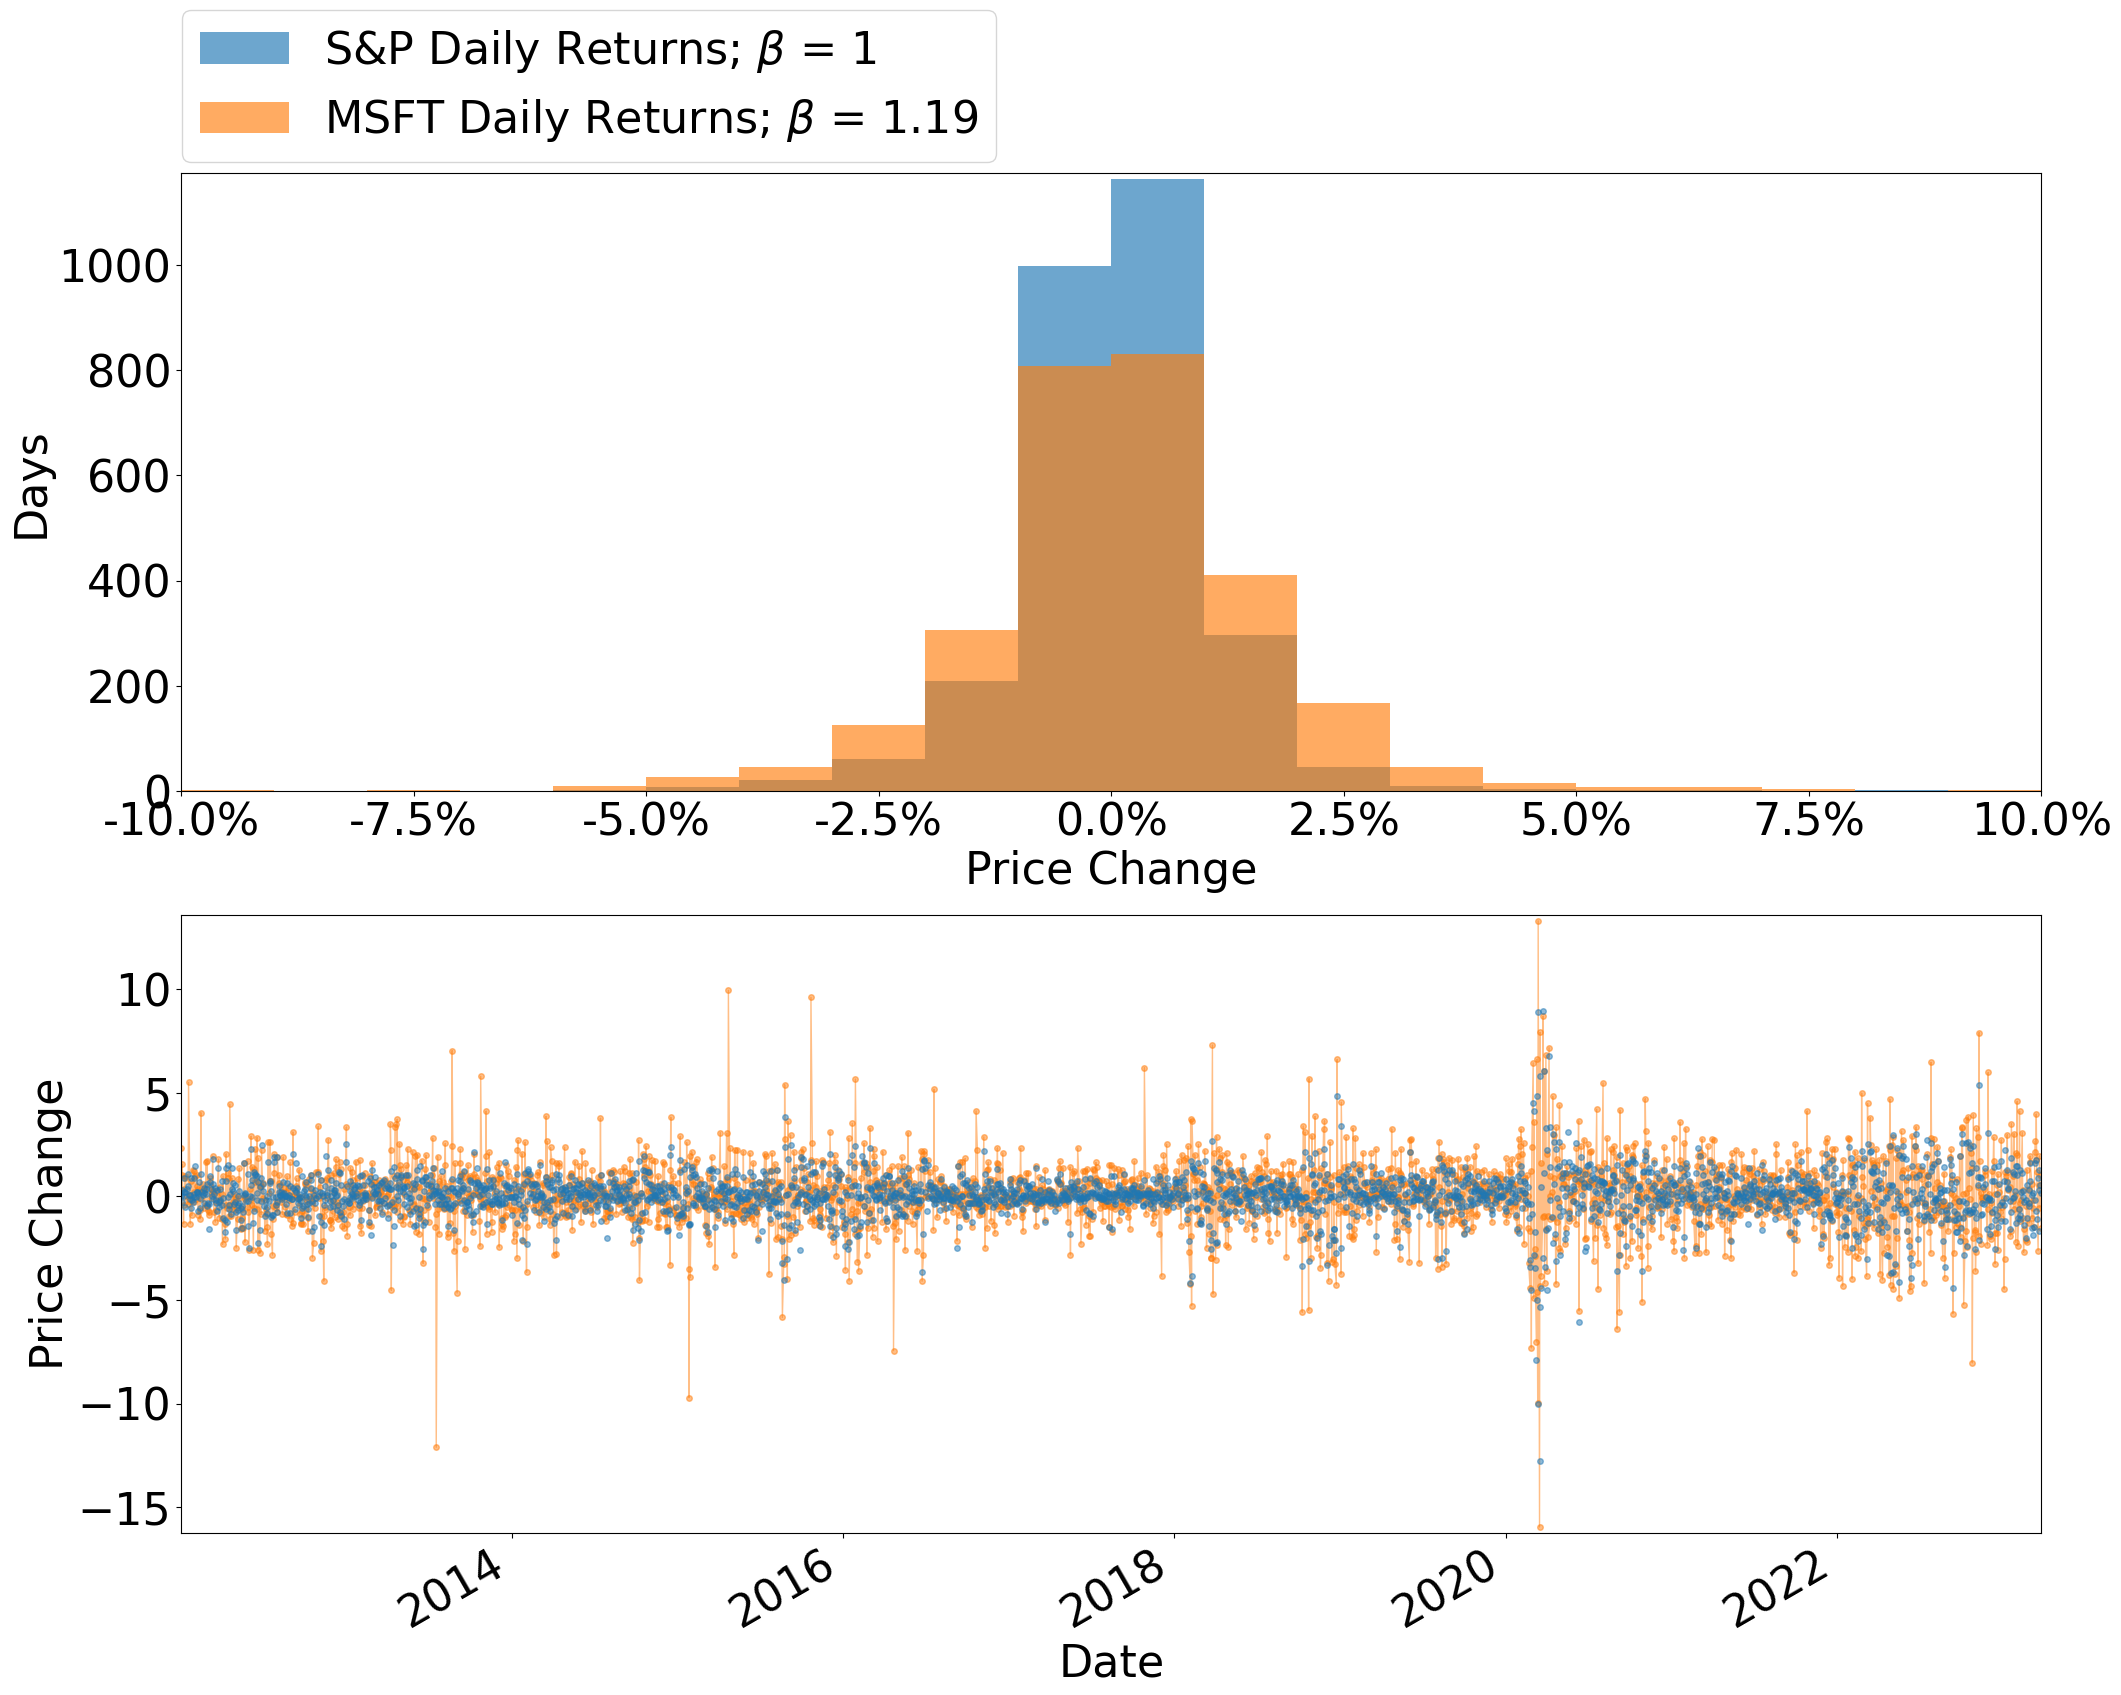

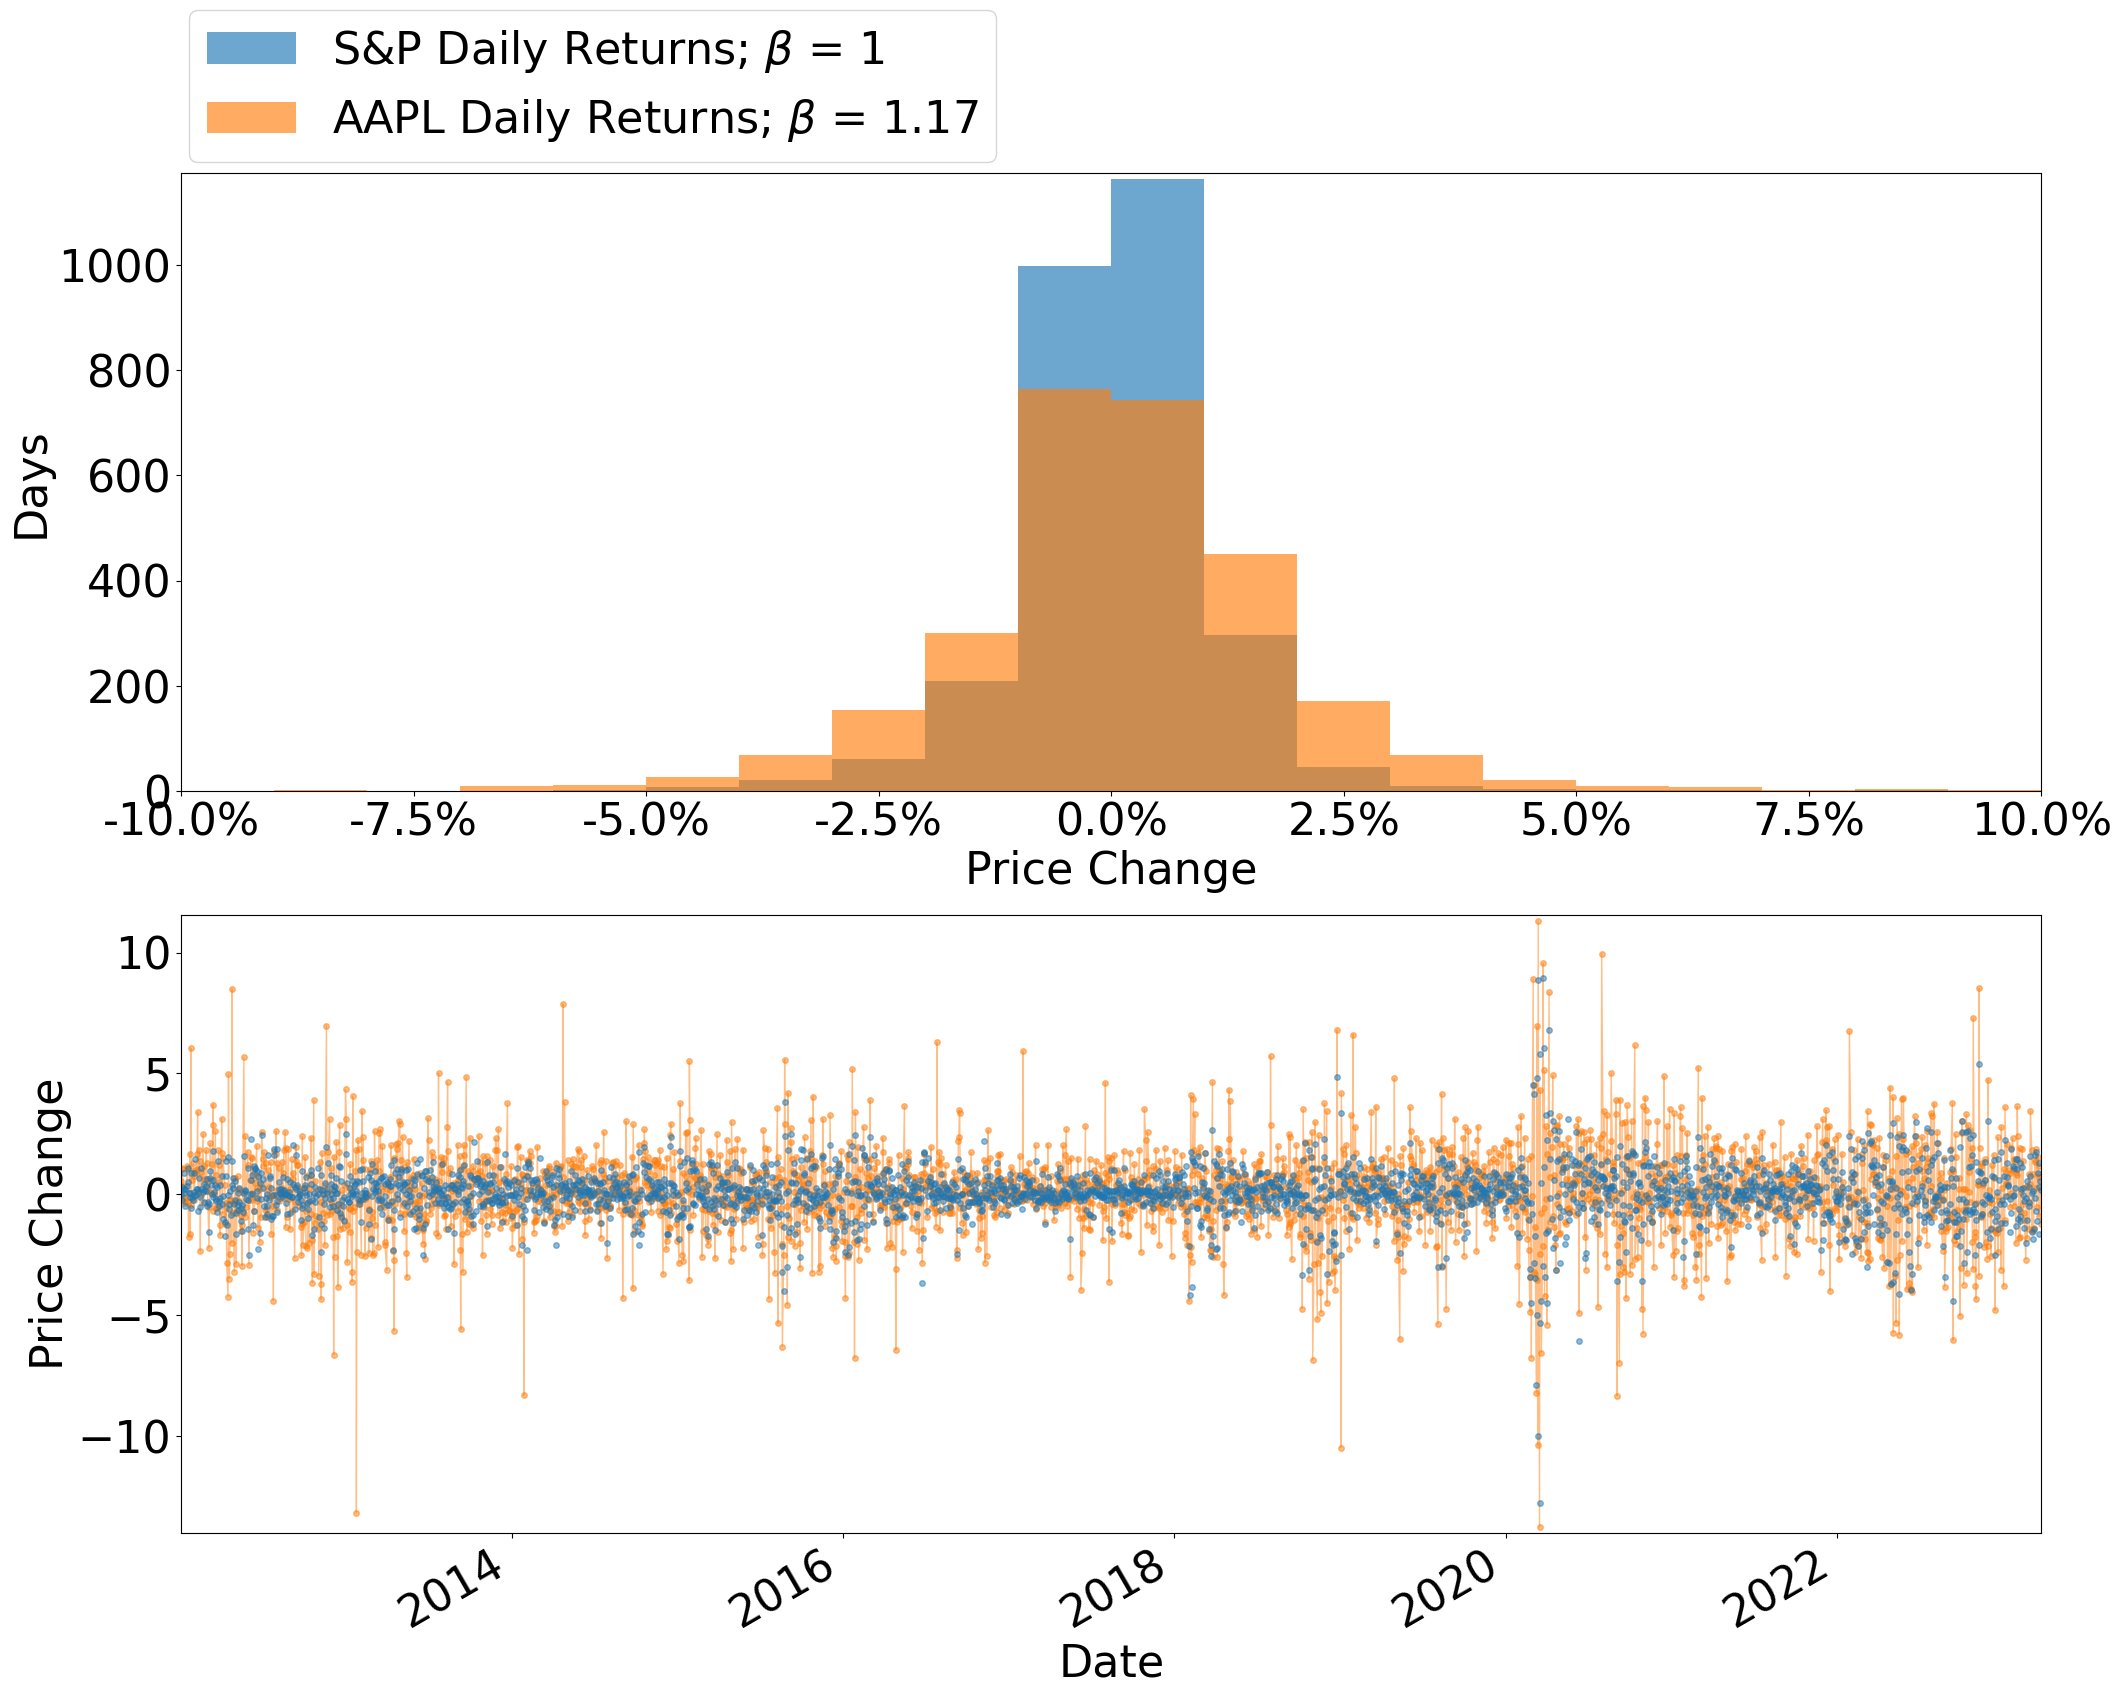

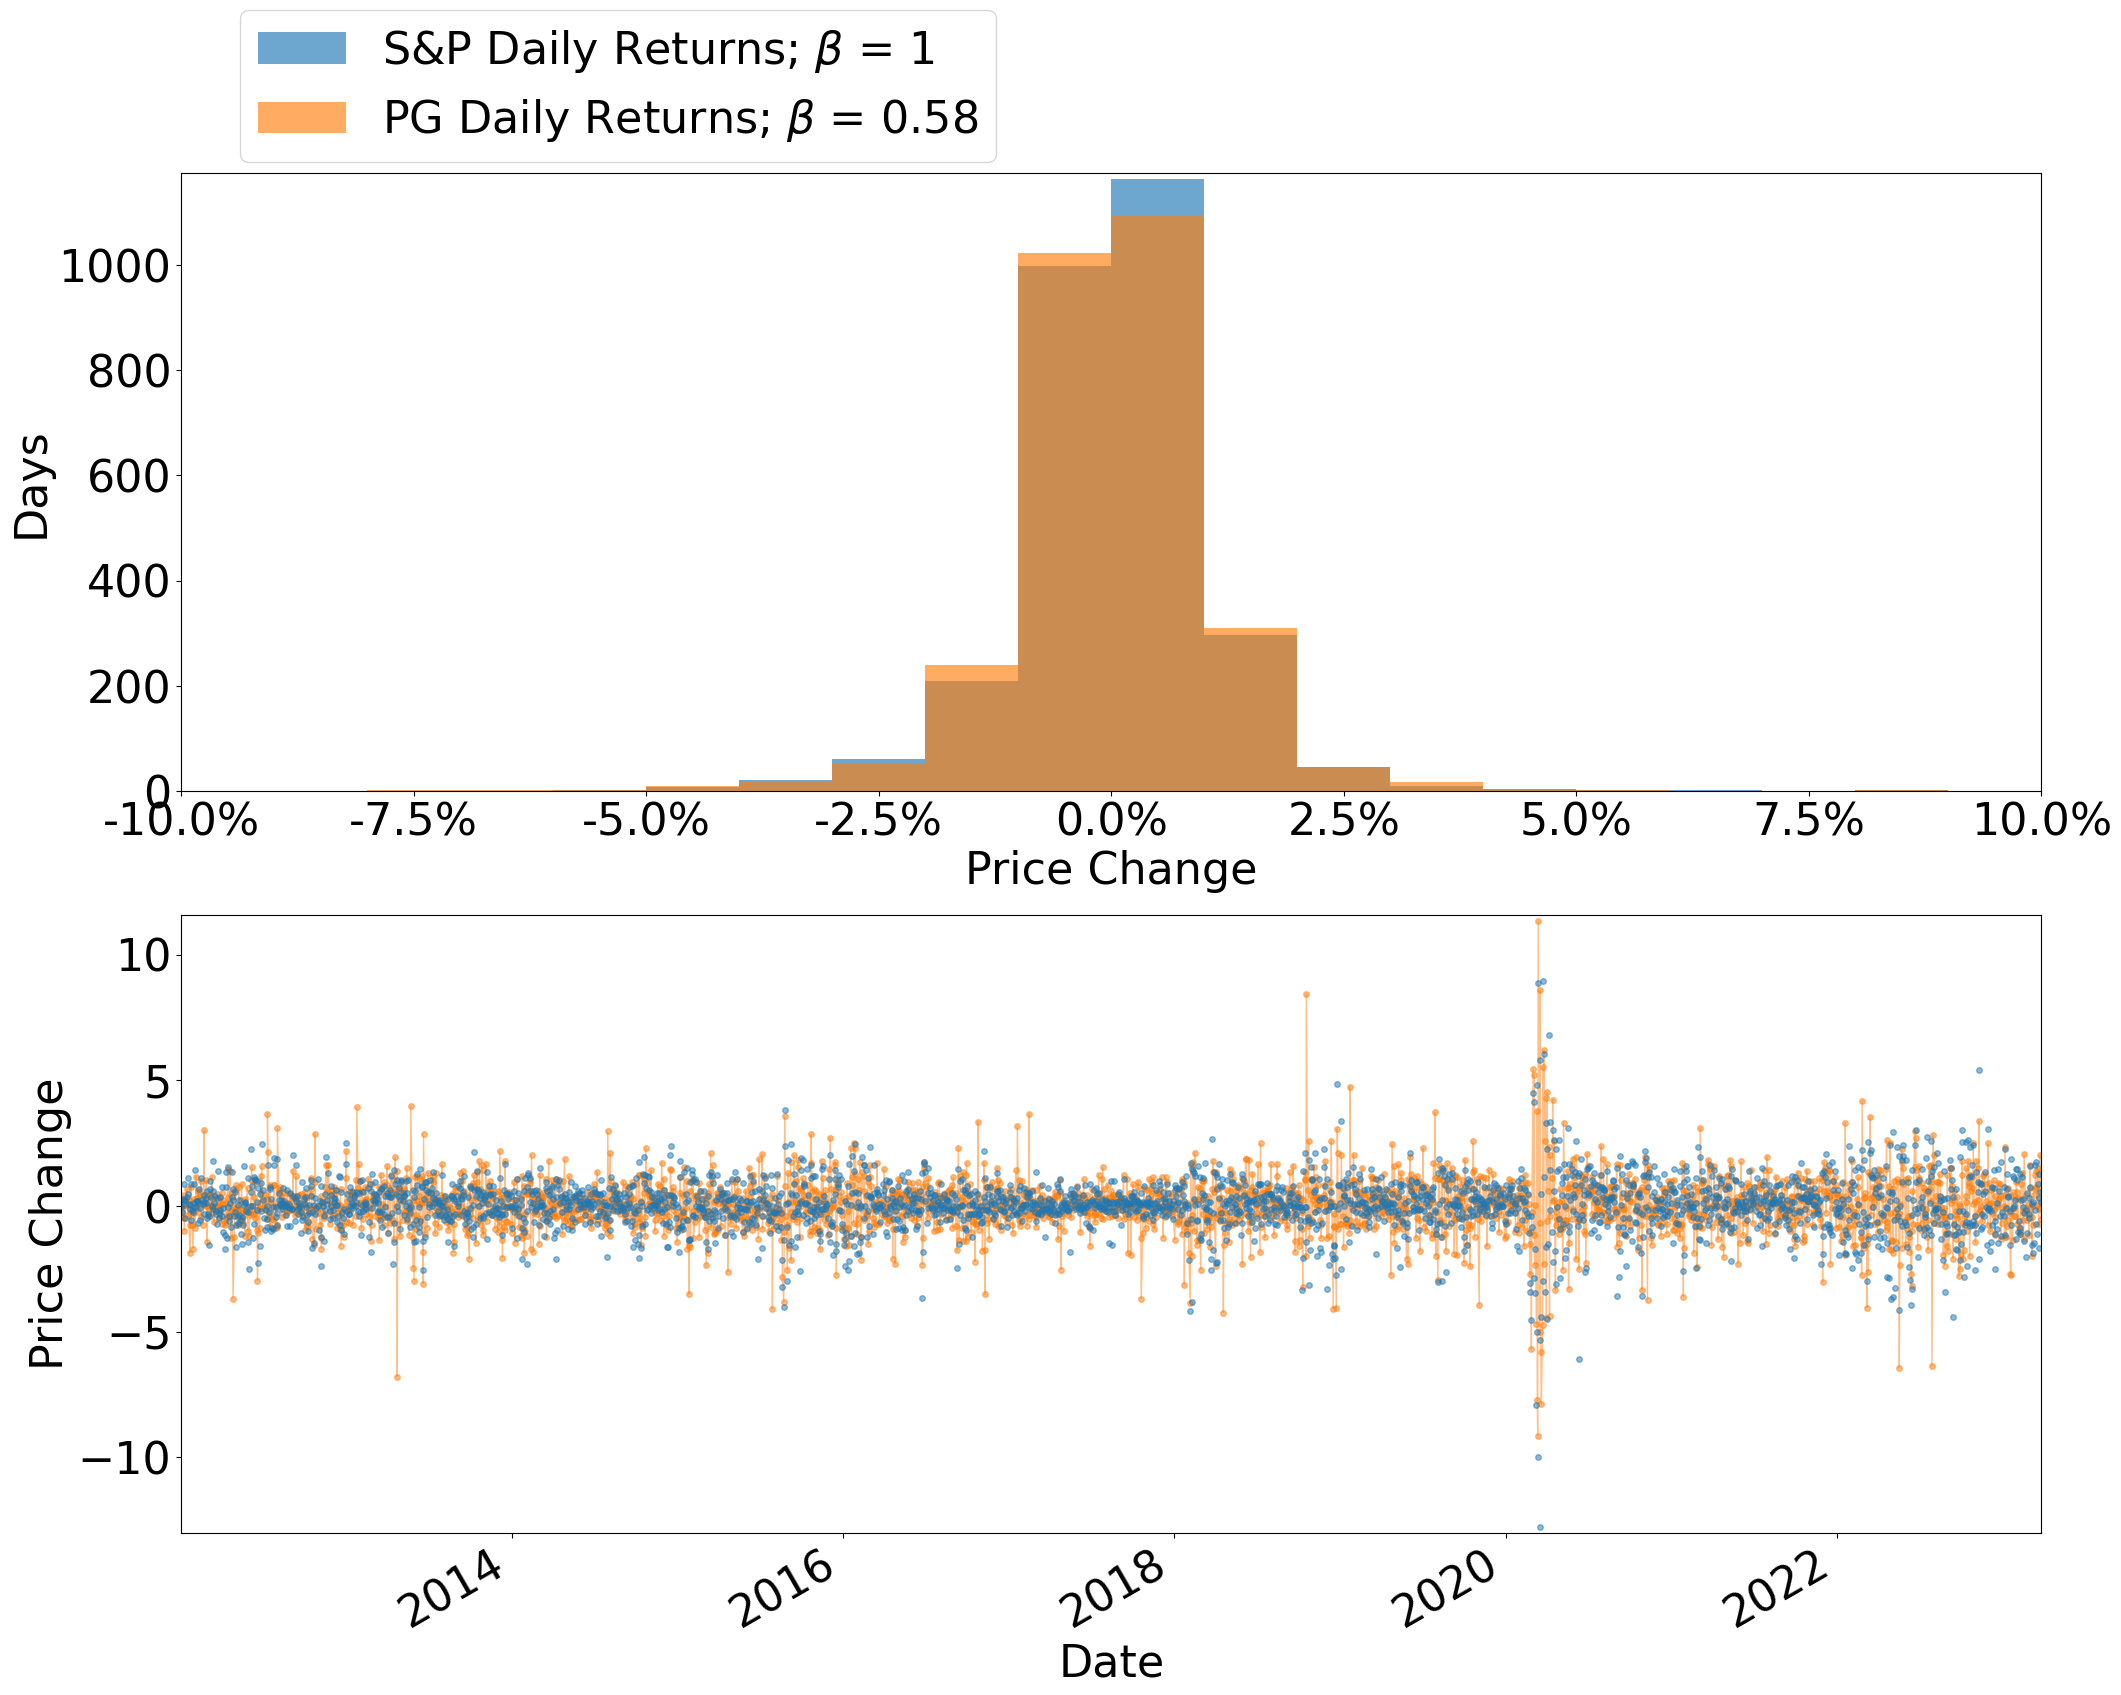

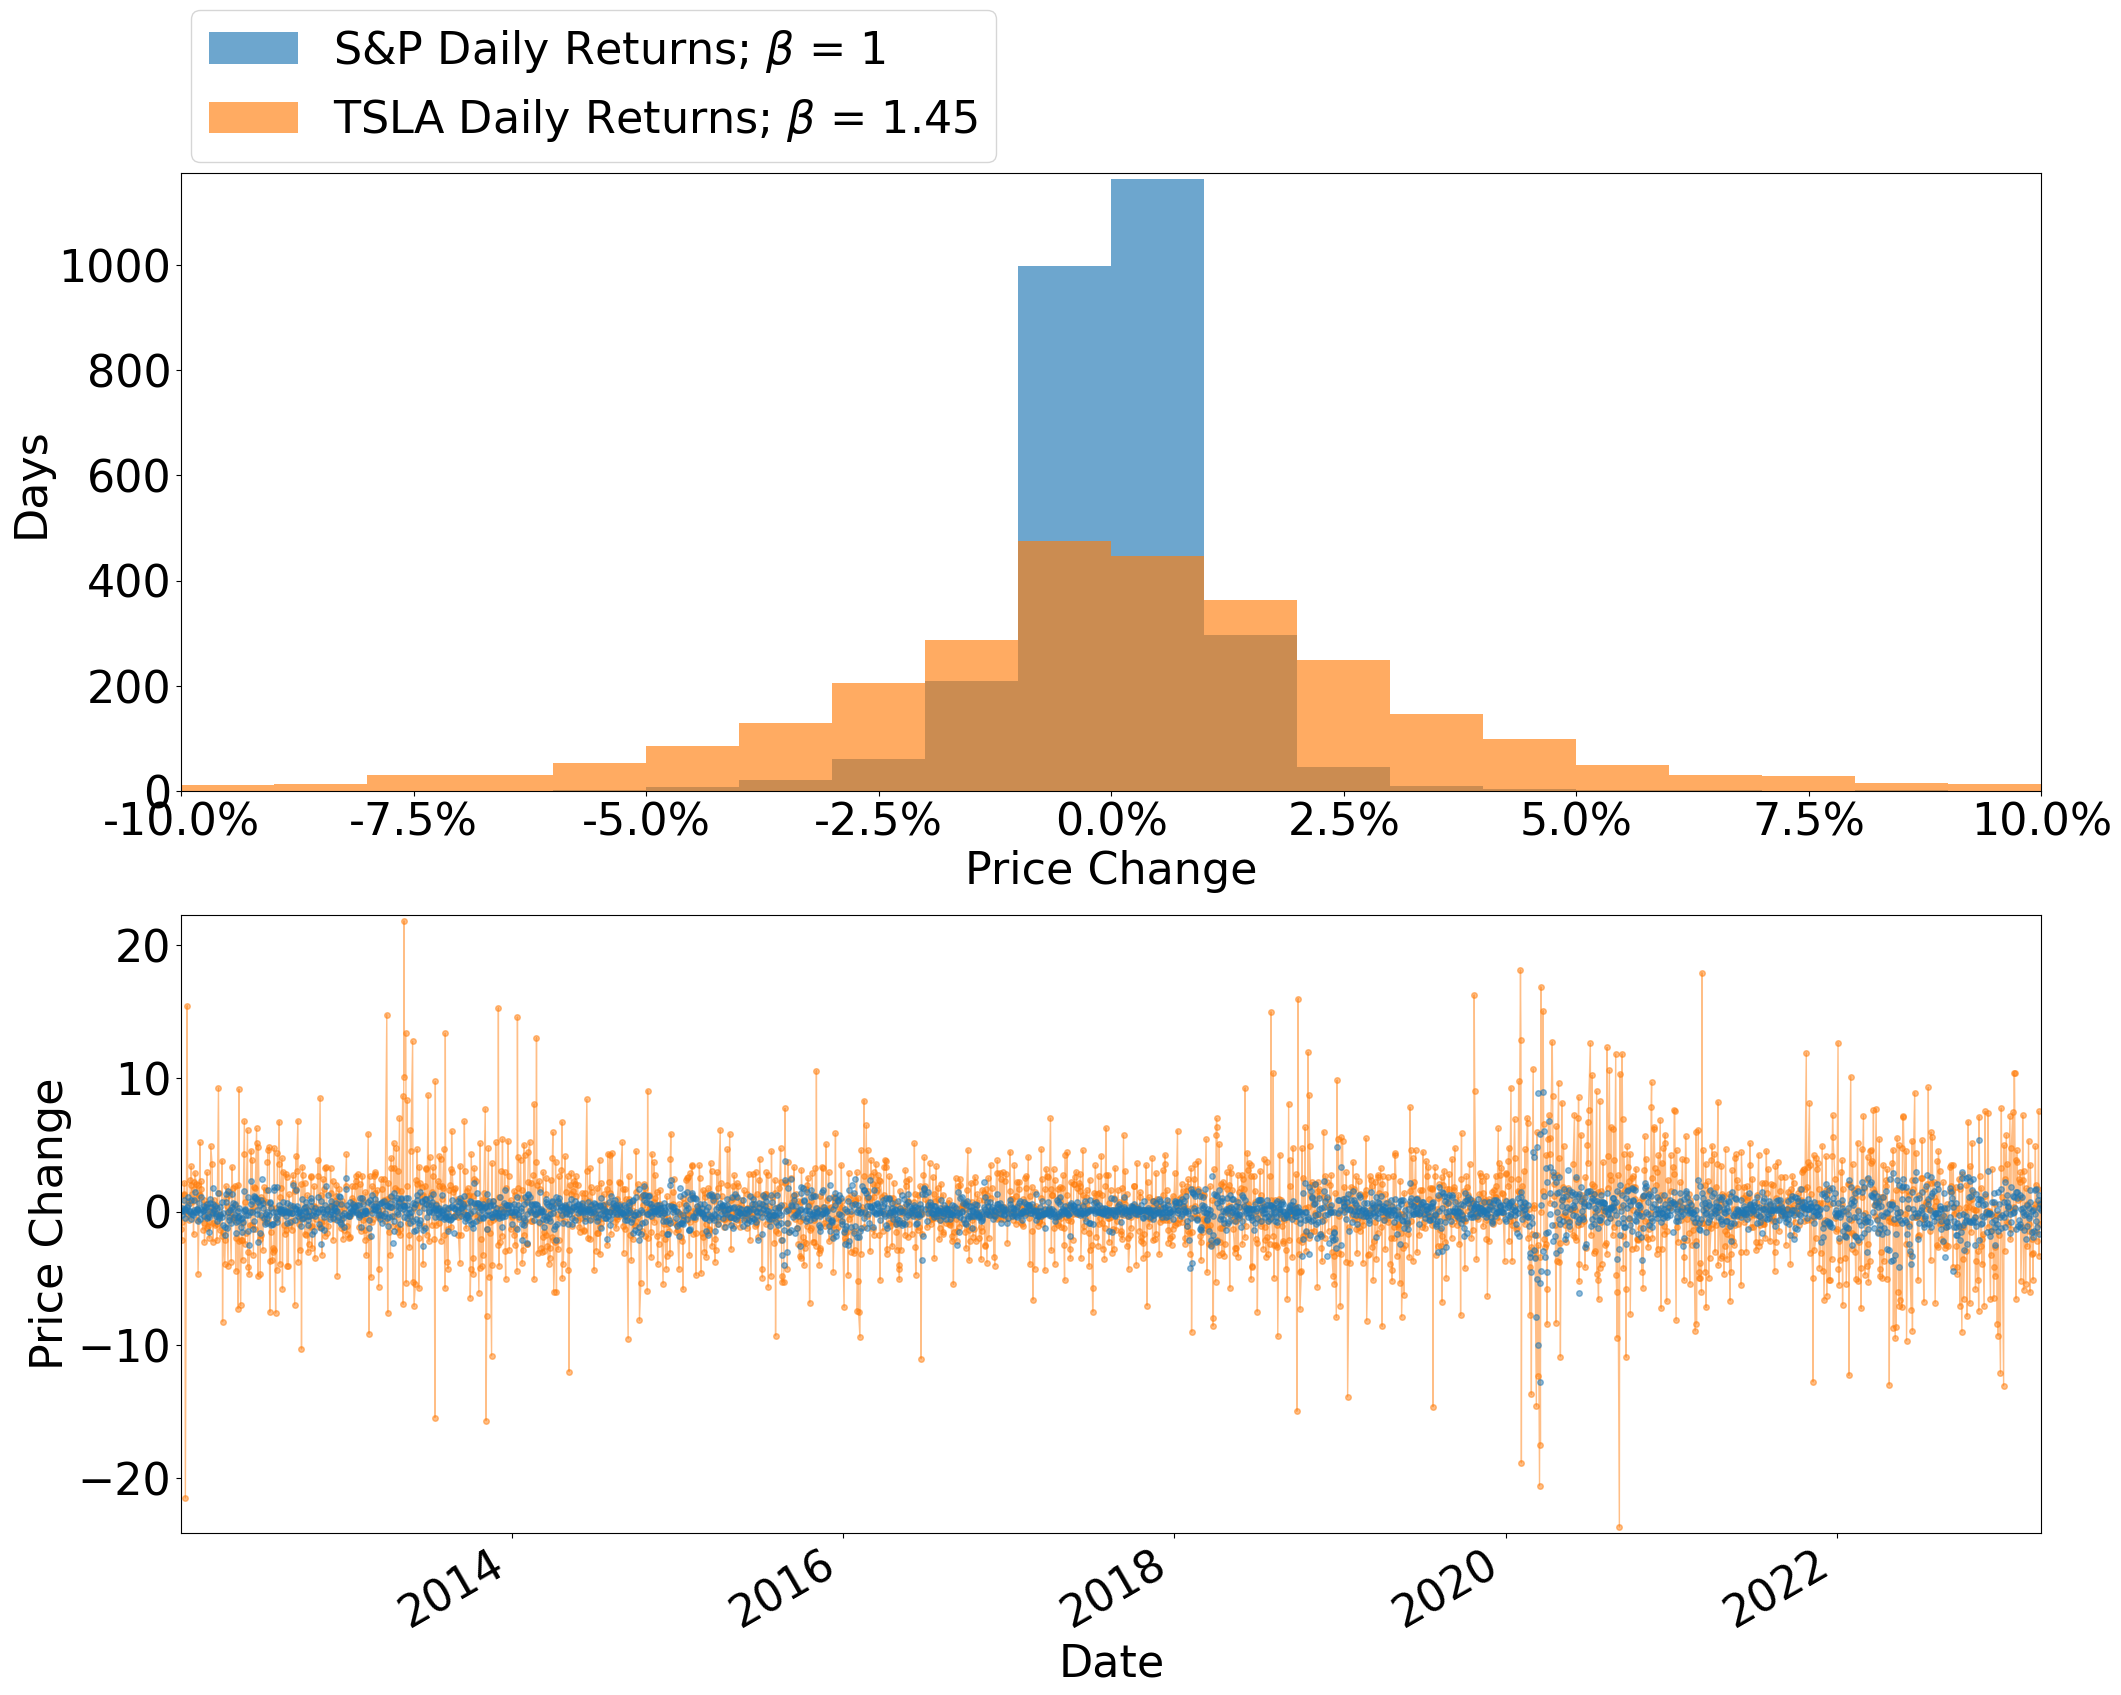

In [35]:
plot_data = price_change_data.mul(100)
for stock in stocks:
    fig, ax = plt.subplots(2,1, figsize = (24,20))
    # plot the distribution of data fro S&P alongside each stock
    plot_data["S&P 500"].hist(
        bins = [x for x in range(-10, 11,1)],
        label = "S&P Daily Returns; $\\beta$ = " + str(1),
        ax = ax[0],
        density = False,
        alpha = .65)
    
    plot_data[stock].hist(
        bins = [x for x in range(-10, 11,1)],
        label = stock + " Daily Returns; $\\beta$ = " + str(betas[stock].round(2)),
        ax = ax[0],
        density = False,
        alpha = .65)
    
    ax[0].legend(bbox_to_anchor = (.45, 1.3))
    ax[0].set_ylabel("Days")
    ax[0].set_xlabel("Price Change")
    ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
    ax[0].grid(False)
    
    # plot a ts scatter of data for S&P alongside each stock
    plot_data[stock].plot(linestyle = "-",
                          linewidth = 1,
                              marker = "o",
                              alpha = .5,
                              markersize = 4,
                              color = "C1",
                              ax = ax[1])
    plot_data["S&P 500"].plot(linestyle = "",
                              marker = "o",
                              alpha = .5,
                              markersize = 4,
                              color = "C0",
                              ax = ax[1])
    ax[1].set_ylabel("Price Change")

### Central Limit Theorem:

If $\bar{X}$ is the mean of a random sample of size $n$ taken
from a population with mean $\mu$ and finite variance $\sigma^2$, then the limiting form of
the distribution of
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$
    </font>
</h3>

 as $\lim_{n \to \infty}$, is the *standard normal distribution* 
 
 The power of the CLT is that this holds no matter the type of distribution we are sampling from. So, for instance, if we took $30$ random samples from a lognormal distribution, the means of the samples would be normally distributed. 
 
 The Z-value tells us: what is the probability that a given sample mean would occur given the sample size and population mean? As n gets larger, the mean is expected to get more accurate if it does follow the population mean $\mu$
 
The gotten _z-score_ tells us how many standard deviations our sample mean $\bar{X}$ is from our population mean $\mu$.
 
 The normal approximation for $\bar{X}$ will generally be good if $n ≥ 30$, provided the population distribution is not terribly skewed. If $n < 30$, the approximation is good only if the population is not too different from a normal distribution and, as stated above, if the population is known to be normal, the sampling distribution of $\bar{X}$ will follow a normal distribution exactly, no matter how small the size of the samples.
 
We also choose the size of the sample, $n$, we want to take from the distributions. $30$ would be sufficient but we will use distributions with $100$ observations. We will draw $1000$ means to observe the mean value theorem visually. 

In [36]:
from matplotlib.animation import FuncAnimation as animation
from IPython import display

In [37]:
n = 100
m = 1000

dist_avgs = {"Die Rolls": [],
            "Poisson": [],
            "Lognormal": []}

# build a sample of m sample means from distributions of length n
for i in range(m):
    dist_avgs["Die Rolls"].append(mean(np.random.randint(1,7,n)))
    dist_avgs["Poisson"].append(mean(np.random.poisson(1,n)))
    dist_avgs["Lognormal"].append(mean(np.random.lognormal(0,1,n)))
    
# each column is a sample of sample means
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

Die Rolls  Poisson  Lognormal
0         3.32     0.82   1.501508
1         3.30     0.99   1.388228
2         3.47     0.83   1.428455
3         3.72     0.90   1.537086
4         3.51     0.96   1.628512
..         ...      ...        ...
995       3.73     1.01   1.602659
996       3.49     0.99   1.910803
997       3.57     1.01   1.724537
998       3.25     1.04   1.477869
999       3.20     0.91   1.546358

[1000 rows x 3 columns]

Text(0.5, 1.0, 'Non-Centered Distributions')

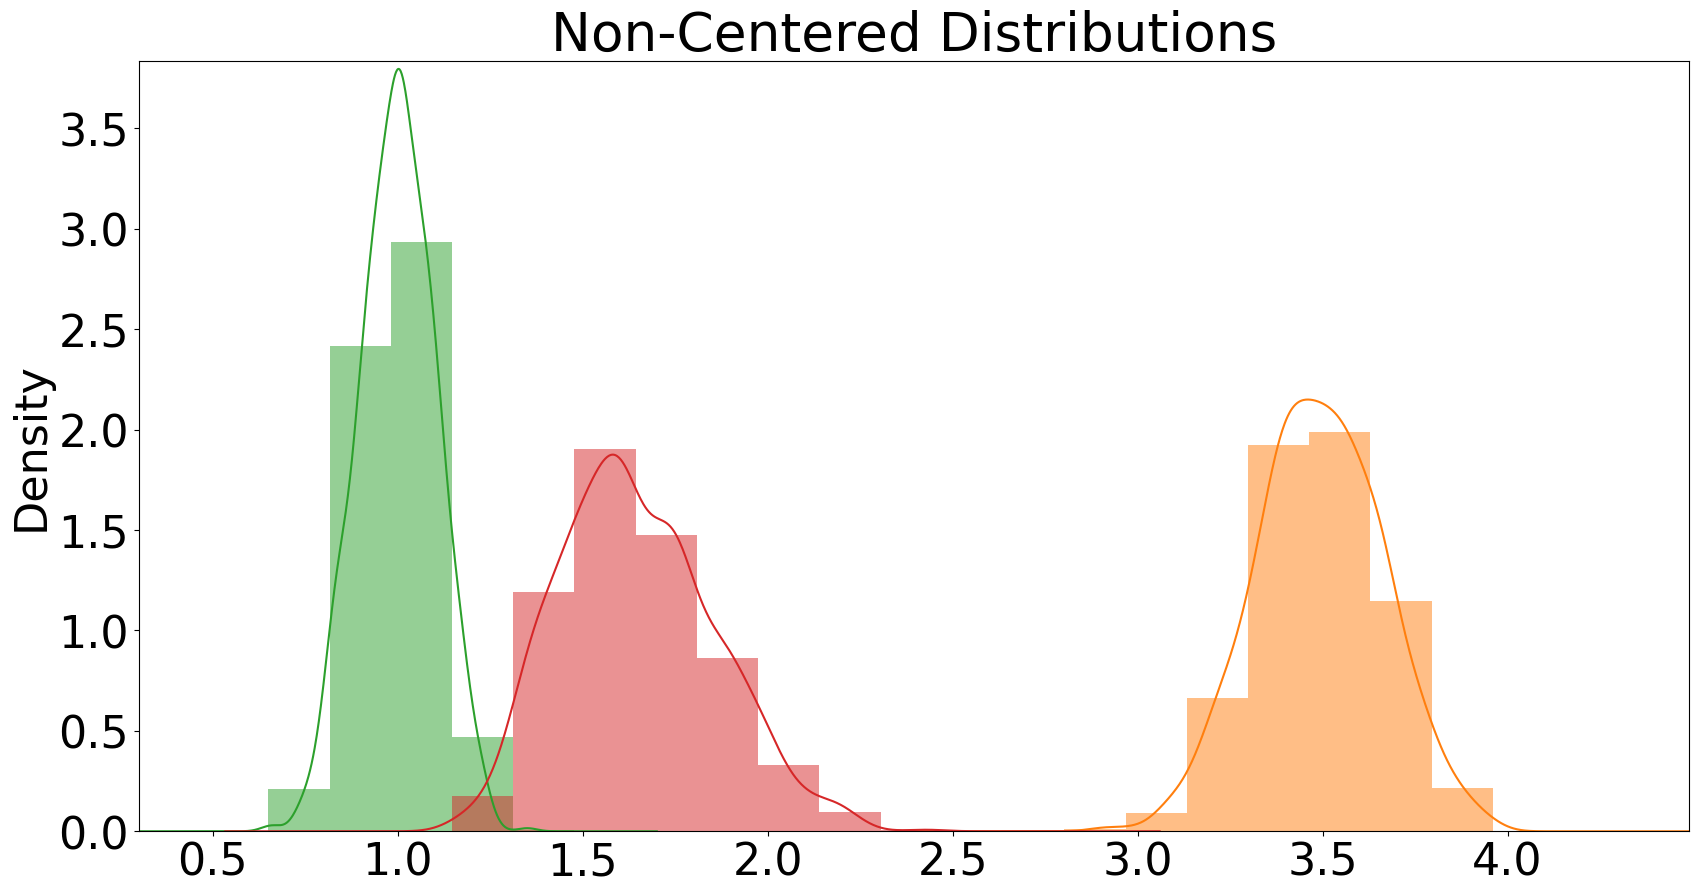

In [48]:
fig, ax = plt.subplots(figsize=(20, 10))
# first, plot the dataframe containing the distributions of the random sample means
dist_avgs.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=ax, color=["C1", "C2", "C3"], legend=False)
ax.set_title("Non-Centered Distributions")

In [49]:
# make a dataframe of means and sds
# make a blank datatframe
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
for key in dist_avgs:
    ## Center Distribution
    # df that centers the distributions at zero by subtracting the mean
    # value from each sample mean
    means_df[key] = dist_avgs[key].sub(dist_avgs.mean()[key])
    ## Normalize Distribution
    #divide each observation by the distributions standard deviation
    sd_df[key] = means_df[key] / means_df.std()[key]

sd_df

Die Rolls   Poisson  Lognormal
0    -0.993314 -1.740680  -0.688402
1    -1.109132 -0.081123  -1.228566
2    -0.124678 -1.643059  -1.036750
3     1.323048 -0.959712  -0.518754
4     0.106958 -0.373986  -0.082795
..         ...       ...        ...
995   1.380957  0.114119  -0.206074
996  -0.008860 -0.081123   1.263278
997   0.454412  0.114119   0.375090
998  -1.398677  0.406982  -0.801122
999  -1.688222 -0.862091  -0.474541

[1000 rows x 3 columns]

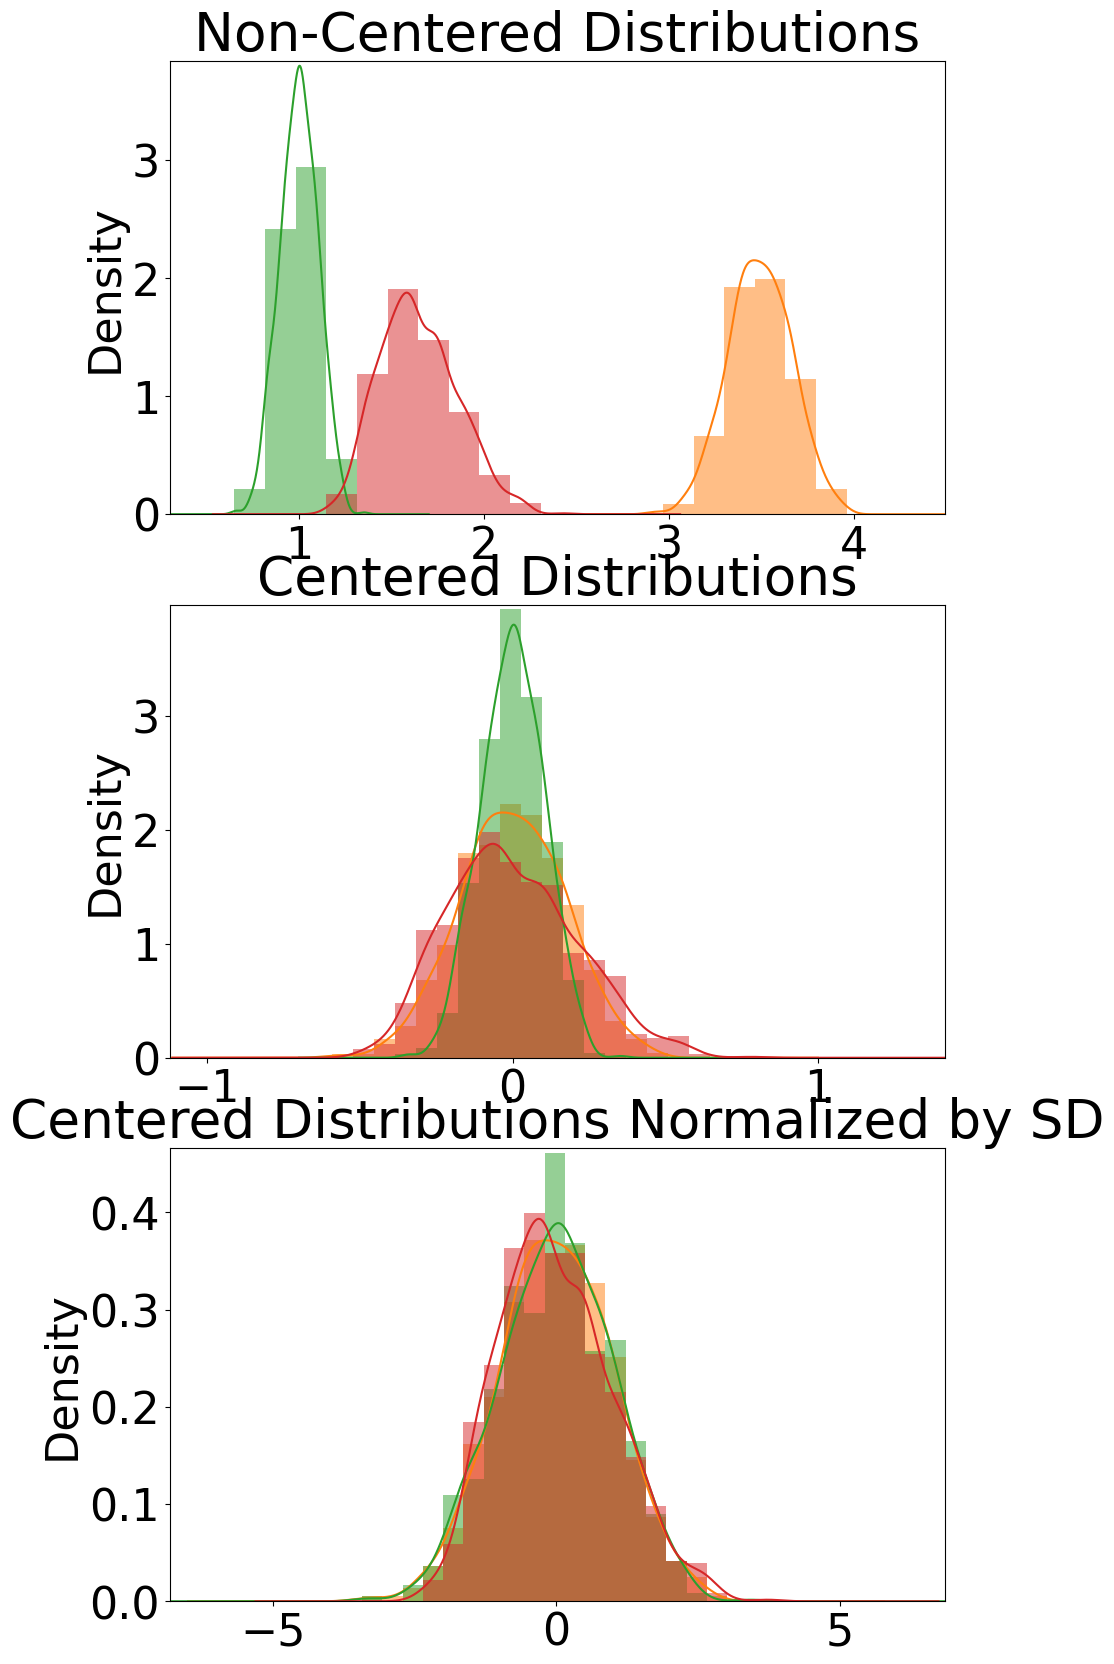

In [53]:
# save dfs in a single dictionary
df_dct = {"Non-Centered Distributions": dist_avgs,
         "Centered Distributions": means_df,
         "Centered Distributions Normalized by SD": sd_df}
# we will use the keys in the dictionary to call each df
keys = list(df_dct.keys())
#automatically count number of keys in dictionary
num_figs = len(keys)
fig, axs = plt.subplots(num_figs, figsize=(10, 20))

# using a for loop with a dictionary of dfs will allow us to
# automate the creation of a multiplot
#cycle through each index value in list of keys
for i in range(num_figs):
    # define the key by the index value
    key = keys[i]
    # select the ax by the index value
    ax = axs[i]
    # select dataframe that is linked to key
    plot_df = df_dct[key]
    # count the number of columns in the data frame
    # this is number of distributions
    num_samples = len(plot_df.keys())
    # each distribution will be assigned its own color
    colors = ["C" + str(c + 1) for c in range(num_samples)]
    # first, plot the dataframe containing the distributions of the random sample means
    plot_df.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color= colors,
                    alpha=.5,
                   legend = False)
    # fit a distribution curve on the relevant data
    plot_df.plot.kde(ax=ax, color=colors, legend=False)
    ax.set_title(key)



# Simulations

### Generating Random Points about a Line

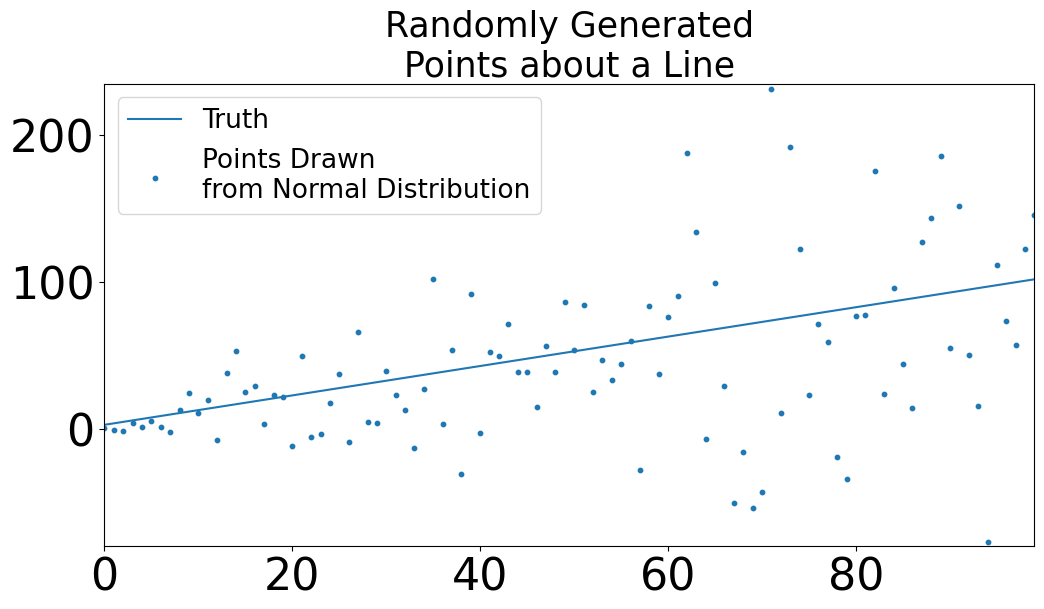

In [70]:
import random 
line = np.array([i + 3 for i in range(100)])
points = []
# generate random points using the values from line
# as mean and standard deviation
for point in line:
    # random.normalvariate(mu = mean, sigma = SD)
    points.append(random.normalvariate(mu = point,
                                       sigma = point))

figure = plt.figure(figsize = (12,6))
plt.plot(line, label = "Truth")
plt.scatter(np.arange(len(points)),
            points,
            label = "Points Drawn\nfrom Normal Distribution",
            s = 10)
plt.title("Randomly Generated\nPoints about a Line", fontsize = 25)
plt.legend(loc = "best", fontsize = 19)
plt.show()

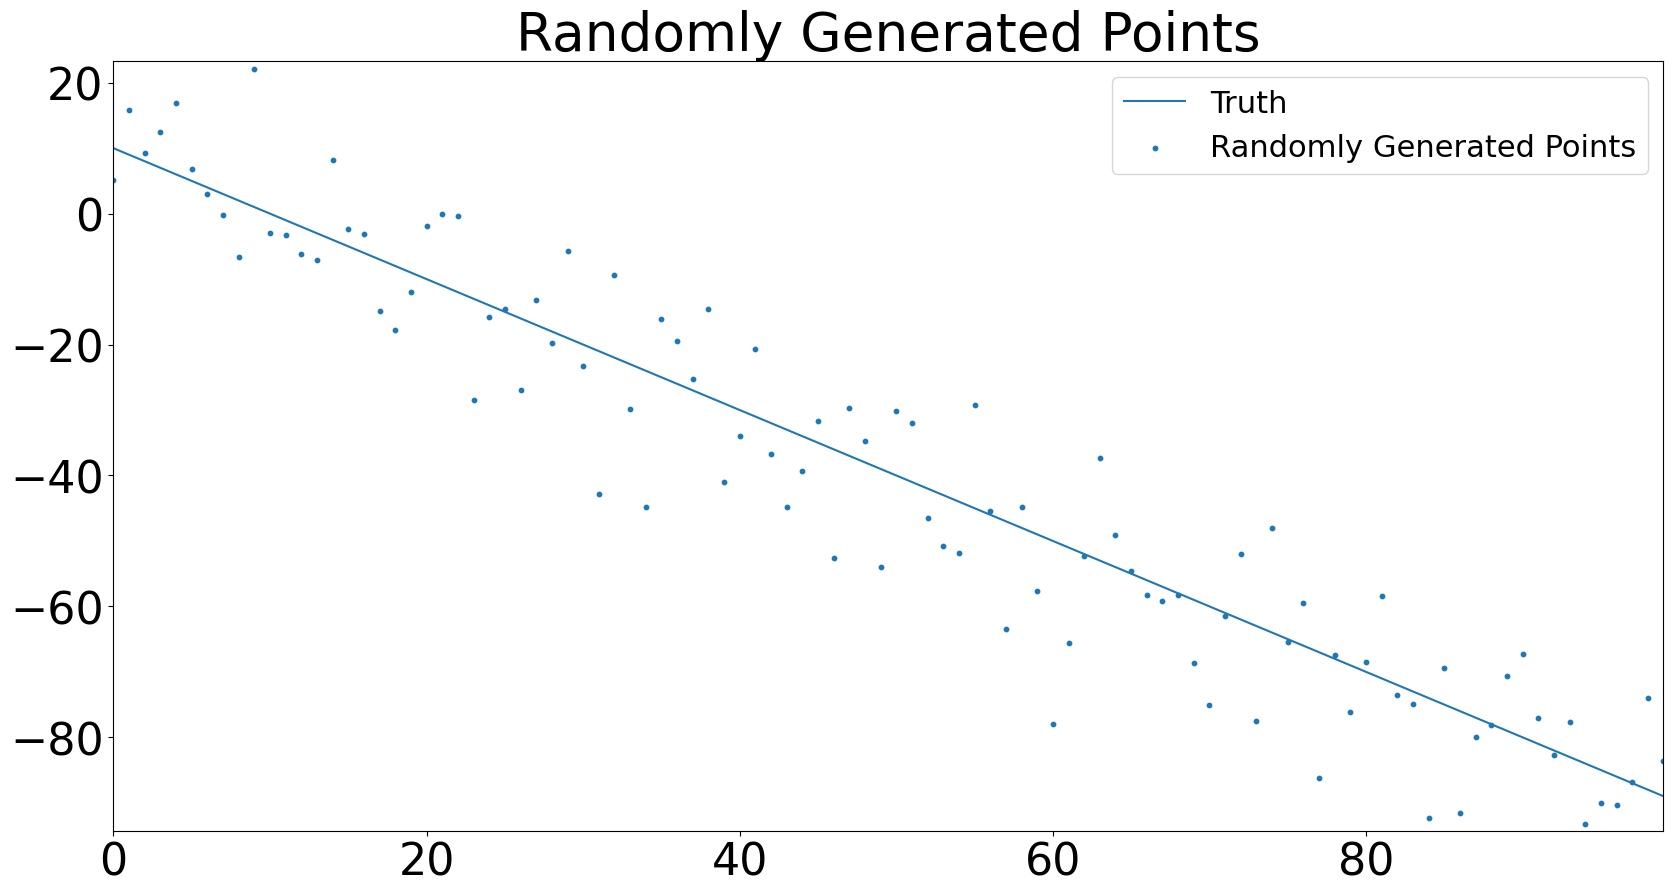

In [75]:
def build_random_data_with_line(y_int, slope, SD = 1):
    line = np.array([slope * (i) + y_int for i in range(100)])
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
    return line, points
# build plot function
def plot_line(line, points, line_name = "Truth",
             title = "Randomly Generated Points"):
    figure = plt.figure(figsize = (20,10))
    plt.plot(line, label = line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = title)
    plt.title(title)
    plt.legend(loc = "best", fontsize = 22)
    plt.show()
line, points = build_random_data_with_line(y_int = 10, slope = -1, SD = 10)
plot_line(line, points)

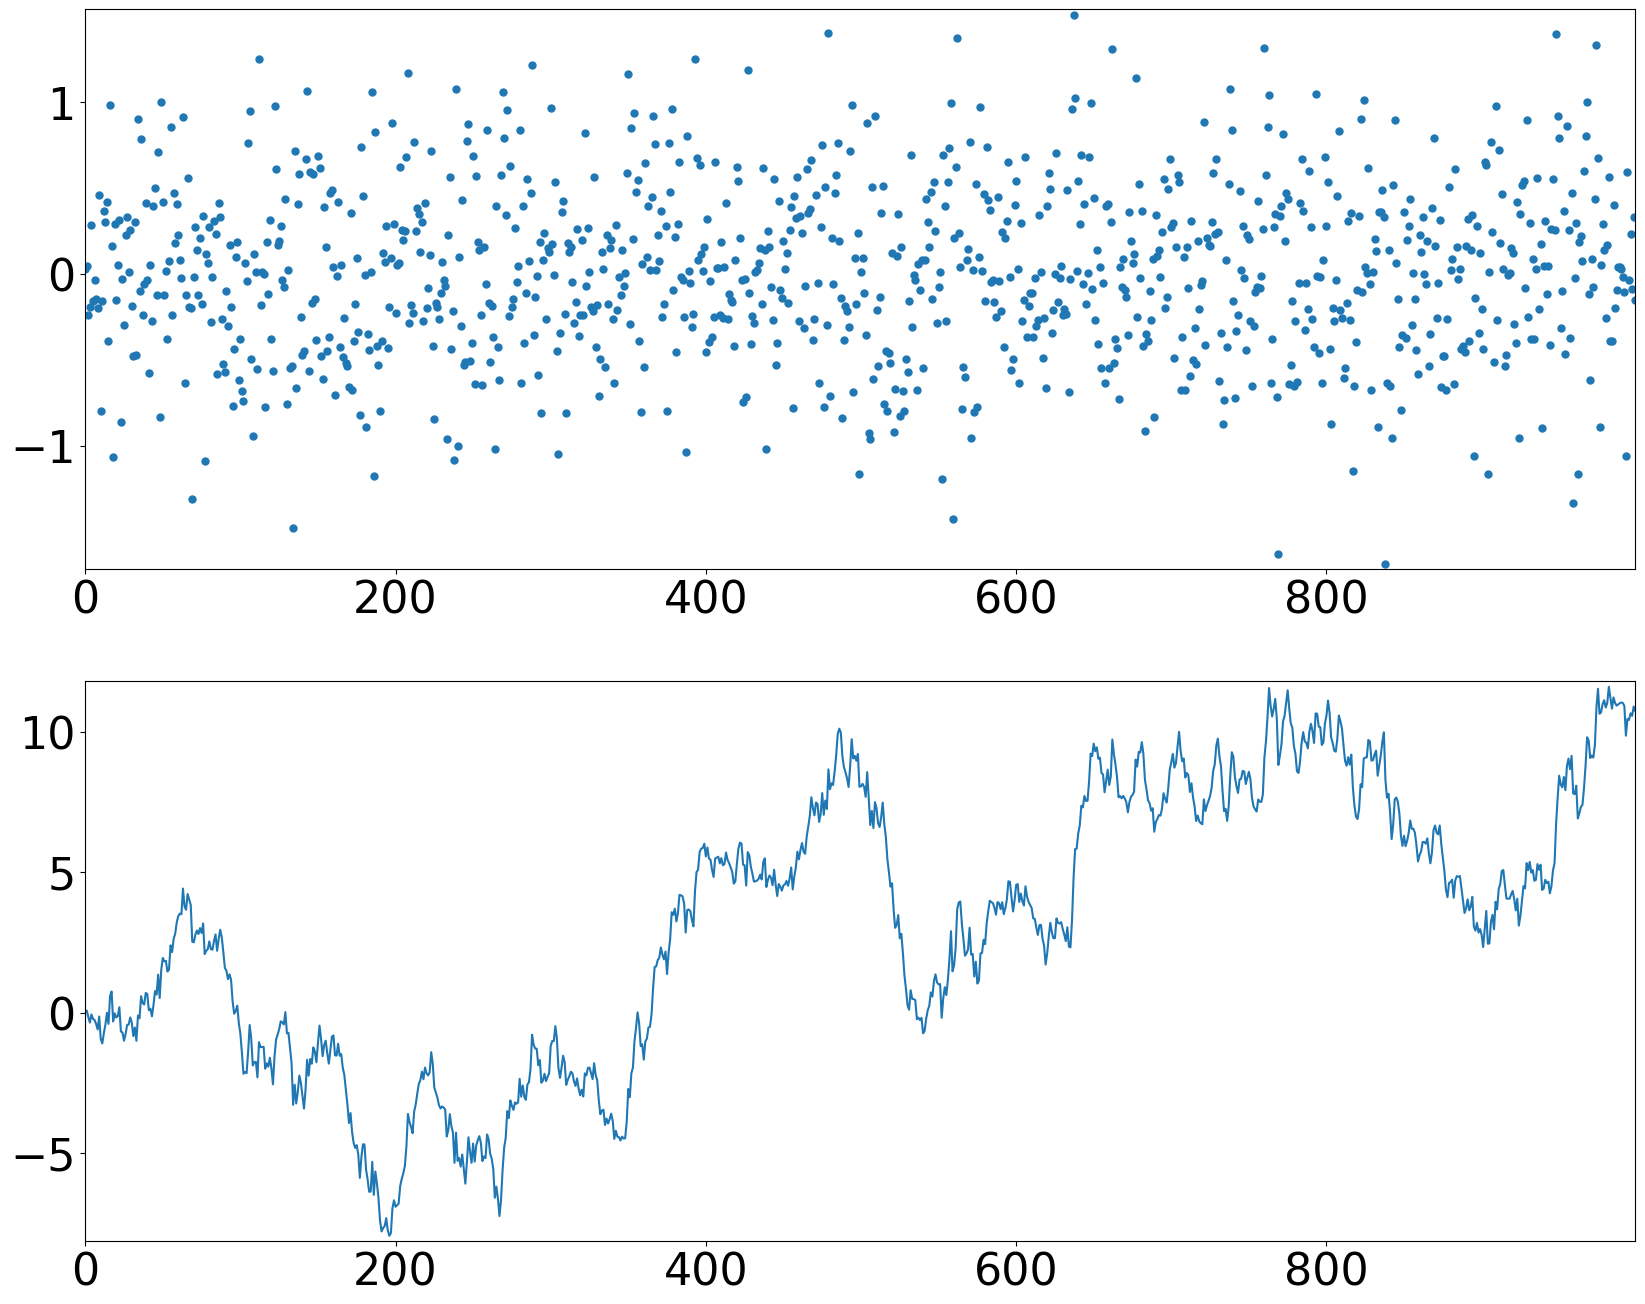

In [82]:
# make a single simulation

random_list = [random.normalvariate(0, .5) for i in range(1000)]
fig, axs = plt.subplots(2, figsize = (20,16))
axs[0].plot(random_list,ls = "", marker = ".", markersize = 10)

simulation = []
for i in range(len(random_list)):
    val = random_list[i]
    # sum up all the changes
    if i == 0:
        simulation.append(val)
    else:
        # add last value observed in simulation + change(which is val)
        # this will generate the latest value in the simulation
        simulation.append(simulation[-1]+ val)
axs[1].plot(simulation)
plt.show()
plt.close()